In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import os

# --- Passo 1: Carica il modello .h5 su Colab ---
# Opzione A: Caricare da Google Drive (consigliato se il modello è lì)
# Assicurati di aver montato il tuo Google Drive in Colab.
# Dal menu di Colab: Runtime -> Change runtime type -> Seleziona GPU se necessario
# Poi in una cella separata:
# from google.colab import drive
# drive.mount('/content/drive')
# Percorso al tuo file .h5 su Google Drive
# model_path = '/content/drive/My Drive/il_tuo_modello.h5'

# Opzione B: Caricare direttamente dal tuo computer locale (per file più piccoli)
# Esegui questa cella e ti chiederà di selezionare il file.
print("Per favore, carica il tuo file .h5.")
from google.colab import files
uploaded = files.upload()

# Trova il nome del file caricato
model_filename = list(uploaded.keys())[0]
model_path = model_filename

# --- Passo 2: Carica il modello .h5 in Keras ---
try:
    print(f"\nCaricamento del modello da: {model_path}...")
    model = load_model(model_path)
    print("Modello caricato con successo!")

    # --- Passo 3: Mostra l'architettura del modello ---
    print("\nArchitettura del modello:")
    model.summary()

    # Opzionale: Salva l'architettura in un'immagine (richiede pydot e graphviz)
    # Potrebbe essere necessario installarli in Colab se non presenti
    try:
        # Assicurati che questi pacchetti siano installati in Colab.
        # Se non lo sono, decommenta le righe seguenti e installali:
        # !pip install pydot graphviz
        # import pydot
        # import graphviz

        keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
        print("\nArchitettura del modello salvata come 'model_architecture.png'")
        print("Puoi scaricare l'immagine dalla sezione 'Files' di Colab.")
    except Exception as e:
        print(f"\nImpossibile generare l'immagine dell'architettura (potrebbe mancare Graphviz/pydot): {e}")
        print("Installali con '!pip install pydot graphviz' e riprova se vuoi l'immagine.")


except Exception as e:
    print(f"\nErrore durante il caricamento o l'ispezione del modello: {e}")
    print("Assicurati che il file sia un modello Keras valido in formato .h5 e che il percorso sia corretto.")

Per favore, carica il tuo file .h5.


Saving TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15.h5 to TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15.h5

Caricamento del modello da: TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15.h5...


Modello caricato con successo!

Architettura del modello:


Model: "TwoConv1D_GlobalAvgPool_Attention"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_for_conv    │ (None, 100, 1)    │          0 │ input_layer[0][0] │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_layer_1      │ (None, 100, 32)   │        128 │ reshape_for_conv… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_layer_2      │ (None, 100, 64)   │      6,208 │ conv1d_layer_1[0… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weights   │ (None, 100, 1)    │         65 │ conv1d_layer_2[0… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_attention  │ (None, 100, 64)   │          0 │ conv1d_layer_2[0… │
│ (Multiply)          │                   │            │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ multiply_attenti… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_layer       │ (None, 64)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc1 (Dense)         │ (None, 128)       │      8,320 │ dropout_layer[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_softmax      │ (None, 2)         │        258 │ fc1[0][0]         │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,981 (58.52 KB)

 Trainable params: 14,979 (58.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


Architettura del modello salvata come 'model_architecture.png'
Puoi scaricare l'immagine dalla sezione 'Files' di Colab.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import os
import json # Per una stampa più leggibile di config

# --- Passo 1: Carica il modello .h5 su Colab ---
# Opzione A: Caricare da Google Drive (consigliato se il modello è lì)
# Assicurati di aver montato il tuo Google Drive in Colab.
# Dal menu di Colab: Runtime -> Change runtime type -> Seleziona GPU se necessario
# Poi in una cella separata:
# from google.colab import drive
# drive.mount('/content/drive')
# Percorso al tuo file .h5 su Google Drive
# model_path = '/content/drive/My Drive/il_tuo_modello.h5'

# Opzione B: Caricare direttamente dal tuo computer locale (per file più piccoli)
# Esegui questa cella e ti chiederà di selezionare il file.
print("Per favore, carica il tuo file .h5.")
from google.colab import files
uploaded = files.upload()

# Trova il nome del file caricato
model_filename = list(uploaded.keys())[0]
model_path = model_filename

# --- Passo 2: Carica il modello .h5 in Keras ---
try:
    print(f"\nCaricamento del modello da: {model_path}...")
    model = load_model(model_path)
    print("Modello caricato con successo!")

    # --- Passo 3: Mostra l'architettura completa del modello (summary) ---
    print("\n--- Architettura Generale del Modello (model.summary()) ---")
    model.summary()

    # --- Passo 4: Mostra i dettagli di configurazione per ogni layer ---
    print("\n--- Dettagli di Configurazione di Ogni Layer (Funzioni di Attivazione, Dropout, ecc.) ---")
    model_config = model.get_config()

    # Se il modello è sequenziale, i layer sono direttamente in 'layers'
    if 'layers' in model_config:
        for layer_config in model_config['layers']:
            layer_name = layer_config['config']['name']
            layer_class = layer_config['class_name']
            layer_details = layer_config['config']

            print(f"\nLayer: {layer_name} (Tipo: {layer_class})")
            for key, value in layer_details.items():
                # Evita di ristampare il nome del layer
                if key == 'name':
                    continue
                # Formatta meglio i dizionari grandi
                if isinstance(value, dict):
                    print(f"  {key}: {json.dumps(value, indent=2)}")
                else:
                    print(f"  {key}: {value}")

    # Se il modello è funzionale o una sottoclasse, 'layers' potrebbe essere più annidato
    # o 'get_config()' restituisce una struttura diversa.
    # Questo approccio con 'get_config()' è più robusto per modelli complessi.
    else:
        print("\nIl modello non è un Sequential model semplice. Stampa la configurazione completa:")
        print(json.dumps(model_config, indent=2))
        print("\nPuoi analizzare il JSON sopra per i dettagli dei layer.")


    # --- Passo 5: Opzionale: Salva l'architettura in un'immagine ---
    # Potrebbe essere necessario installare pydot e graphviz in Colab se non presenti
    try:
        # Assicurati che questi pacchetti siano installati in Colab.
        # Se non lo sono, decommenta le righe seguenti e installali:
        # !pip install pydot graphviz
        # import pydot
        # import graphviz

        keras.utils.plot_model(model, to_file='model_architecture_detailed.png',
                               show_shapes=True,
                               show_layer_names=True,
                               show_layer_activations=True # Nuovo parametro per attivazioni
                               )
        print("\nArchitettura del modello salvata come 'model_architecture_detailed.png'")
        print("Puoi scaricare l'immagine dalla sezione 'Files' di Colab.")
    except ImportError:
        print("\nPer generare l'immagine dell'architettura con dettagli, installa:")
        print("!pip install pydot graphviz")
        print("e riavvia il runtime, poi riprova questa sezione.")
    except Exception as e:
        print(f"\nErrore durante la generazione dell'immagine dell'architettura: {e}")
        print("Assicurati che Graphviz sia correttamente installato e configurato nel PATH di Colab.")


except Exception as e:
    print(f"\nErrore durante il caricamento o l'ispezione del modello: {e}")
    print("Assicurati che il file sia un modello Keras valido in formato .h5 e che il percorso sia corretto.")
    print("Controlla anche la versione di TensorFlow/Keras con cui è stato salvato il modello.")

Per favore, carica il tuo file .h5.


Saving TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15.h5 to TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15 (1).h5

Caricamento del modello da: TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15 (1).h5...
Modello caricato con successo!

--- Architettura Generale del Modello (model.summary()) ---


Model: "TwoConv1D_GlobalAvgPool_Attention"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_for_conv    │ (None, 100, 1)    │          0 │ input_layer[0][0] │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_layer_1      │ (None, 100, 32)   │        128 │ reshape_for_conv… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_layer_2      │ (None, 100, 64)   │      6,208 │ conv1d_layer_1[0… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weights   │ (None, 100, 1)    │         65 │ conv1d_layer_2[0… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_attention  │ (None, 100, 64)   │          0 │ conv1d_layer_2[0… │
│ (Multiply)          │                   │            │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ multiply_attenti… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_layer       │ (None, 64)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fc1 (Dense)         │ (None, 128)       │      8,320 │ dropout_layer[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_softmax      │ (None, 2)         │        258 │ fc1[0][0]         │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,981 (58.52 KB)

 Trainable params: 14,979 (58.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


--- Dettagli di Configurazione di Ogni Layer (Funzioni di Attivazione, Dropout, ecc.) ---

Layer: input_layer (Tipo: InputLayer)
  batch_shape: (None, 100)
  dtype: float32
  sparse: False

Layer: reshape_for_conv (Tipo: Reshape)
  trainable: True
  dtype: {
  "module": "keras",
  "class_name": "DTypePolicy",
  "config": {
    "name": "float32"
  },
  "registered_name": null
}
  target_shape: (100, 1)

Layer: conv1d_layer_1 (Tipo: Conv1D)
  trainable: True
  dtype: {
  "module": "keras",
  "class_name": "DTypePolicy",
  "config": {
    "name": "float32"
  },
  "registered_name": null
}
  filters: 32
  kernel_size: (3,)
  strides: (1,)
  padding: same
  data_format: channels_last
  dilation_rate: (1,)
  groups: 1
  activation: relu
  use_bias: True
  kernel_initializer: {
  "module": "keras.initializers",
  "class_name": "GlorotUniform",
  "config": {
    "seed": null
  },
  "registered_name": null
}
  bias_initializer: {
  "module": "keras.initializers",
  "class_name": "Zeros",
  "co

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# --- Passo 1: Carica il modello .h5 su Colab ---
# Opzione A: Caricare da Google Drive (consigliato se il modello è lì)
# from google.colab import drive
# drive.mount('/content/drive')
# model_path = '/content/drive/My Drive/il_tuo_modello.h5'

# Opzione B: Caricare direttamente dal tuo computer locale (per file più piccoli)
print("Per favore, carica il tuo file .h5.")
from google.colab import files
uploaded = files.upload()
model_filename = list(uploaded.keys())[0]
model_path = model_filename

# --- Passo 2: Carica il modello .h5 in Keras ---
try:
    print(f"\nCaricamento del modello da: {model_path}...")
    model = load_model(model_path)
    print("Modello caricato con successo!")

    # --- Passo 3: Visualizzazione dei pesi e dei bias per ogni layer ---
    print("\n--- Visualizzazione Pesi e Bias dei Layer ---")

    for i, layer in enumerate(model.layers):
        # I layer che non hanno parametri allenabili (es. Flatten, Dropout, Activation come layer separato)
        # non avranno pesi o bias associati.
        # Controlliamo se il layer ha attributi 'weights'.
        if len(layer.get_weights()) > 0:
            print(f"\nLayer {i+1}: {layer.name} (Tipo: {layer.__class__.__name__})")
            weights = layer.get_weights()[0] # Il primo elemento è solitamente i pesi (kernel)
            biases = layer.get_weights()[1] if len(layer.get_weights()) > 1 else None # Il secondo è il bias, se esiste

            print(f"  Shape dei Pesi (Weights): {weights.shape}")
            print(f"  Valori Minimi Pesi: {np.min(weights):.4f}")
            print(f"  Valori Massimi Pesi: {np.max(weights):.4f}")
            print(f"  Media Assoluta Pesi: {np.mean(np.abs(weights)):.4f}") # Utile per vedere la magnitudine

            if biases is not None:
                print(f"  Shape dei Bias: {biases.shape}")
                print(f"  Valori Minimi Bias: {np.min(biases):.4f}")
                print(f"  Valori Massimi Bias: {np.max(biases):.4f}")
                print(f"  Media Assoluta Bias: {np.mean(np.abs(biases)):.4f}")

            # --- Metodi di Visualizzazione Avanzati (Specifici per tipo di layer) ---

            # Per Layer Convoluzionali (Conv2D, Conv1D, Conv3D)
            if 'Conv' in layer.__class__.__name__ and 'kernel' in layer_config['config']:
                print("\n  --- Visualizzazione Filtri Convoluzionali ---")
                # I pesi dei filtri hanno spesso la forma (altezza, larghezza, canali_input, num_filtri)
                # o (larghezza, canali_input, num_filtri) per Conv1D
                filters = weights
                num_filters = filters.shape[-1]
                num_channels = filters.shape[-2] # Canali di input

                # Se è 2D, mostra come immagini
                if len(filters.shape) == 4: # Conv2D
                    # Disegna un sottoinsieme dei filtri per non riempire lo schermo
                    n_rows = 2
                    n_cols = min(8, num_filters) # Limita a 8 colonne
                    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
                    for filter_i in range(min(num_filters, n_rows * n_cols)):
                        plt.subplot(n_rows, n_cols, filter_i + 1)
                        # Assumiamo che il filtro sia per un singolo canale di input per la visualizzazione
                        # Se ha più canali di input (e.g., RGB), potresti visualizzarne solo uno
                        if num_channels > 1:
                            # Prendi la prima slice di canale per la visualizzazione
                            plt.imshow(filters[:, :, 0, filter_i], cmap='gray')
                        else:
                            plt.imshow(filters[:, :, 0, filter_i], cmap='gray')
                        plt.axis('off')
                        plt.title(f'Filter {filter_i+1}')
                    plt.suptitle(f'Filtri del Layer {layer.name}')
                    plt.show()

                elif len(filters.shape) == 3: # Conv1D
                    print(f"  Difficile visualizzare i filtri 1D come immagini. Shape: {filters.shape}")
                    # Puoi stampare una sezione dei valori o un istogramma
                    # plt.figure(figsize=(8, 4))
                    # plt.plot(filters[:, 0, 0]) # Esempio: primi valori del primo filtro, primo canale
                    # plt.title(f'Sample 1D Filter from {layer.name}')
                    # plt.show()

            # Per Layer Densi (Dense)
            elif 'Dense' in layer.__class__.__name__ and 'kernel' in layer_config['config']:
                print("\n  --- Analisi Pesi Layer Densi ---")
                # I pesi dei layer densi hanno la forma (input_features, output_features)
                # È difficile visualizzarli direttamente come immagini, ma possiamo guardare la loro distribuzione.
                plt.figure(figsize=(10, 5))
                plt.hist(weights.flatten(), bins=50, color='skyblue', edgecolor='black')
                plt.title(f'Distribuzione dei Pesi nel Layer {layer.name}')
                plt.xlabel('Valore del Peso')
                plt.ylabel('Frequenza')
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.show()

                if biases is not None:
                    plt.figure(figsize=(10, 3))
                    plt.hist(biases.flatten(), bins=20, color='lightcoral', edgecolor='black')
                    plt.title(f'Distribuzione dei Bias nel Layer {layer.name}')
                    plt.xlabel('Valore del Bias')
                    plt.ylabel('Frequenza')
                    plt.grid(True, linestyle='--', alpha=0.6)
                    plt.show()

        else:
            print(f"\nLayer {i+1}: {layer.name} (Tipo: {layer.__class__.__name__}) - Non ha parametri allenabili.")

except Exception as e:
    print(f"\nErrore durante il caricamento o l'ispezione dei pesi del modello: {e}")
    print("Assicurati che il file sia un modello Keras valido in formato .h5 e che il percorso sia corretto.")
    print("Controlla anche la versione di TensorFlow/Keras con cui è stato salvato il modello.")

Per favore, carica il tuo file .h5.


Saving TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15.h5 to TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15 (2).h5

Caricamento del modello da: TwoConv1D_GlobalAvgPool_Attention_awgn_RANDOM_snr_11-15 (2).h5...
Modello caricato con successo!

--- Visualizzazione Pesi e Bias dei Layer ---

Layer 1: input_layer (Tipo: InputLayer) - Non ha parametri allenabili.

Layer 2: reshape_for_conv (Tipo: Reshape) - Non ha parametri allenabili.

Layer 3: conv1d_layer_1 (Tipo: Conv1D)
  Shape dei Pesi (Weights): (3, 1, 32)
  Valori Minimi Pesi: -0.5239
  Valori Massimi Pesi: 0.3568
  Media Assoluta Pesi: 0.2144
  Shape dei Bias: (32,)
  Valori Minimi Bias: -0.2706
  Valori Massimi Bias: 0.1579
  Media Assoluta Bias: 0.1198

Layer 4: conv1d_layer_2 (Tipo: Conv1D)
  Shape dei Pesi (Weights): (3, 32, 64)
  Valori Minimi Pesi: -0.7901
  Valori Massimi Pesi: 0.7237
  Media Assoluta Pesi: 0.1605
  Shape dei Bias: (64,)
  Valori Minimi Bias: -0.1012
  Valori Massimi Bias: 0.1316
  Media Asso

Per favore, carica il tuo file .h5.


Saving TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_0-20.h5 to TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_0-20.h5

Caricamento del modello da: TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_0-20.h5...


Modello caricato con successo!

--- Analisi di Somiglianza dei Pesi all'interno di Ogni Layer ---

Layer 1: input_layer_8 (Tipo: InputLayer) - Non ha parametri allenabili.

Layer 2: reshape_for_conv (Tipo: Reshape) - Non ha parametri allenabili.

Analizzando il Layer: conv1d_layer_1 (Tipo: Conv1D)


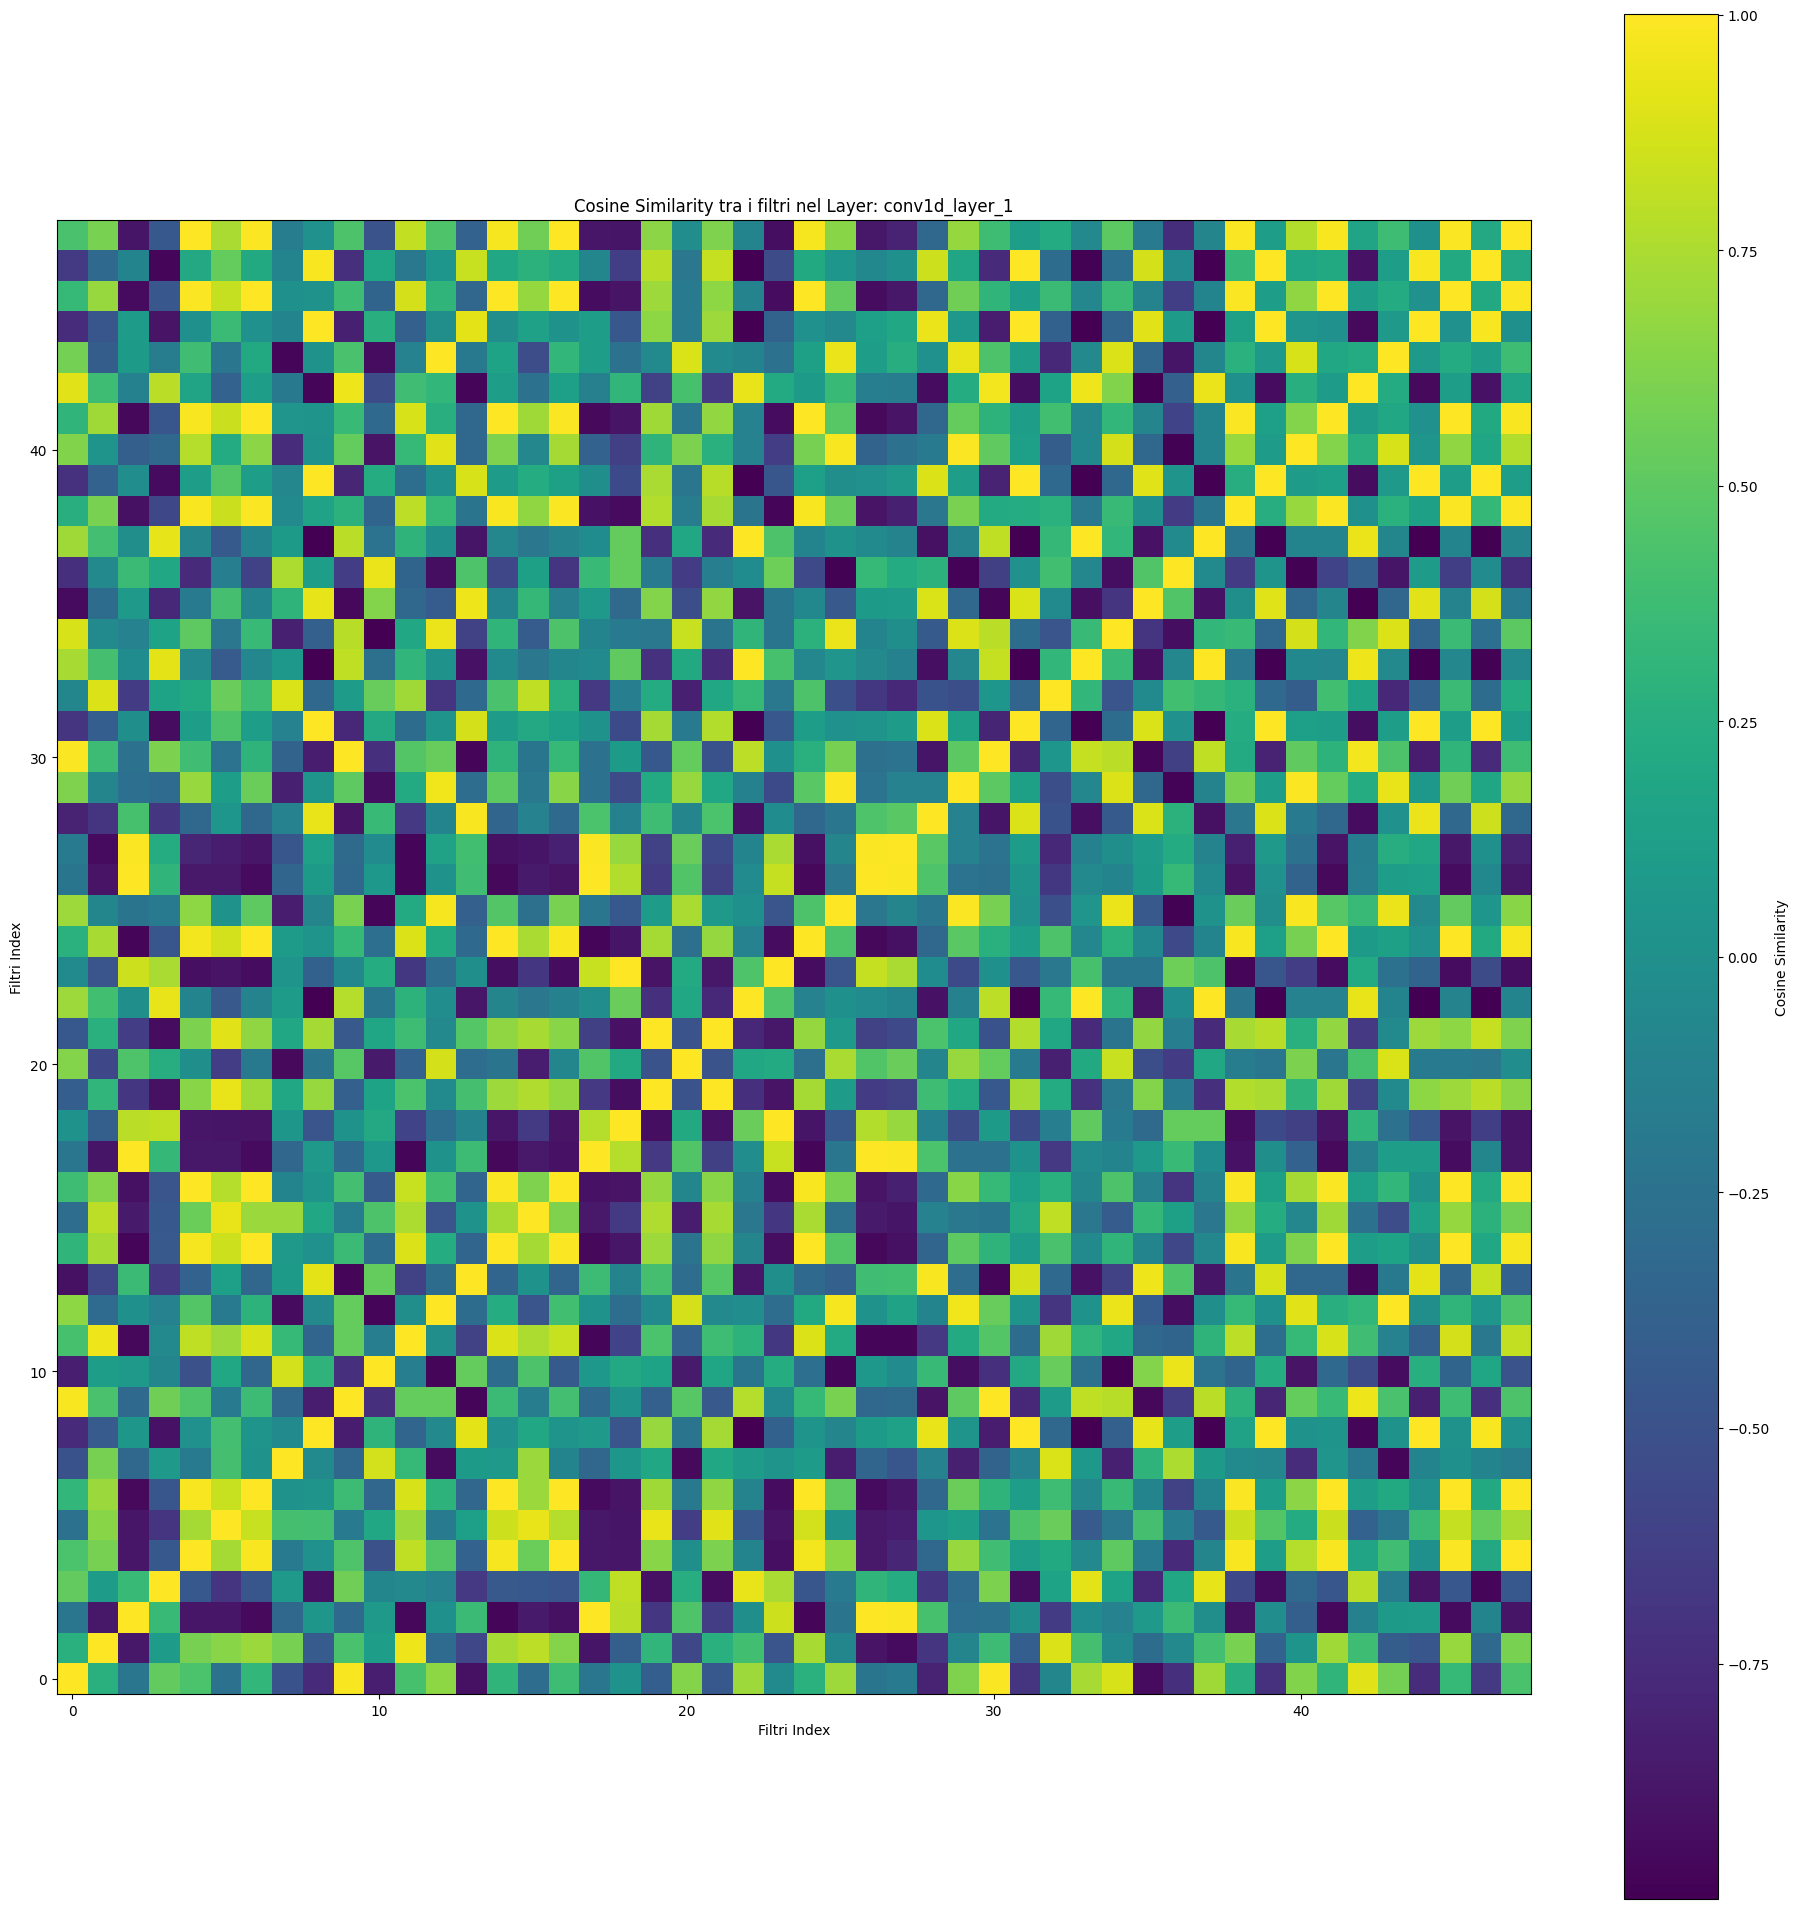

  Analisi di Somiglianza per 48 filtri.
  Somiglianza Cosinus Media (tra unità diverse): 0.0258
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: conv1d_layer_2 (Tipo: Conv1D)


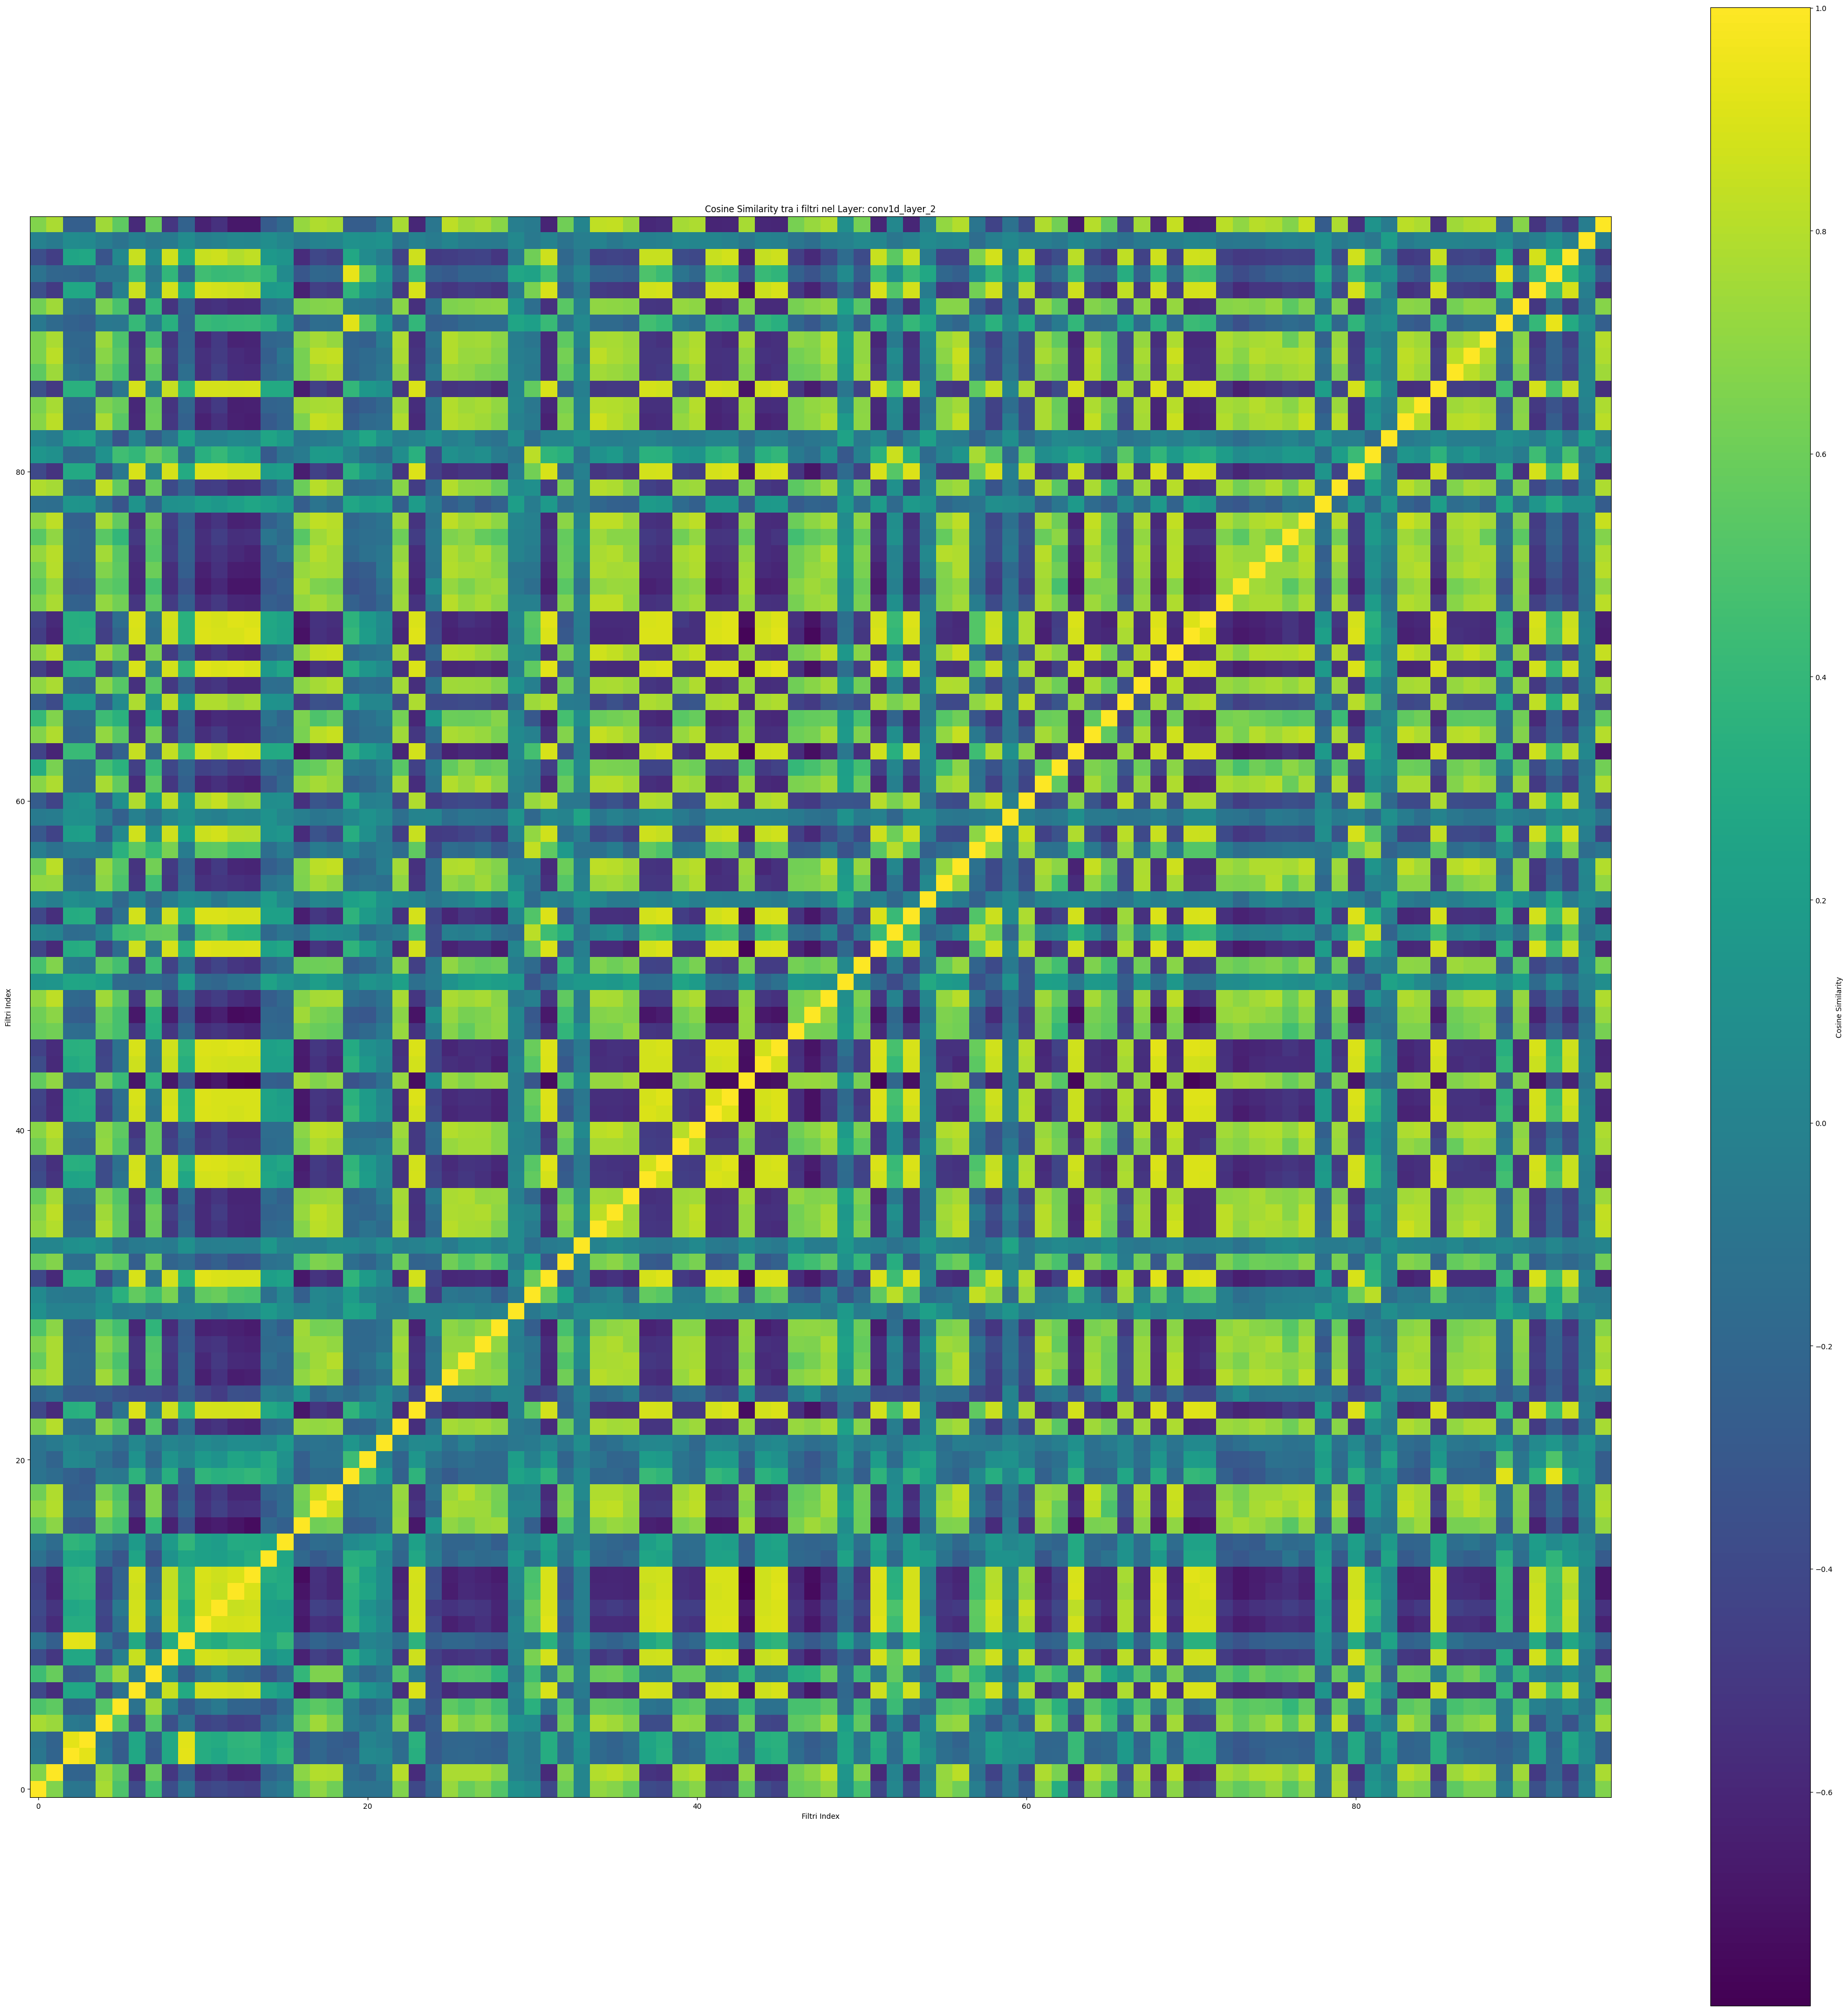

  Analisi di Somiglianza per 96 filtri.
  Somiglianza Cosinus Media (tra unità diverse): 0.0919
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: attention_weights (Tipo: Conv1D)


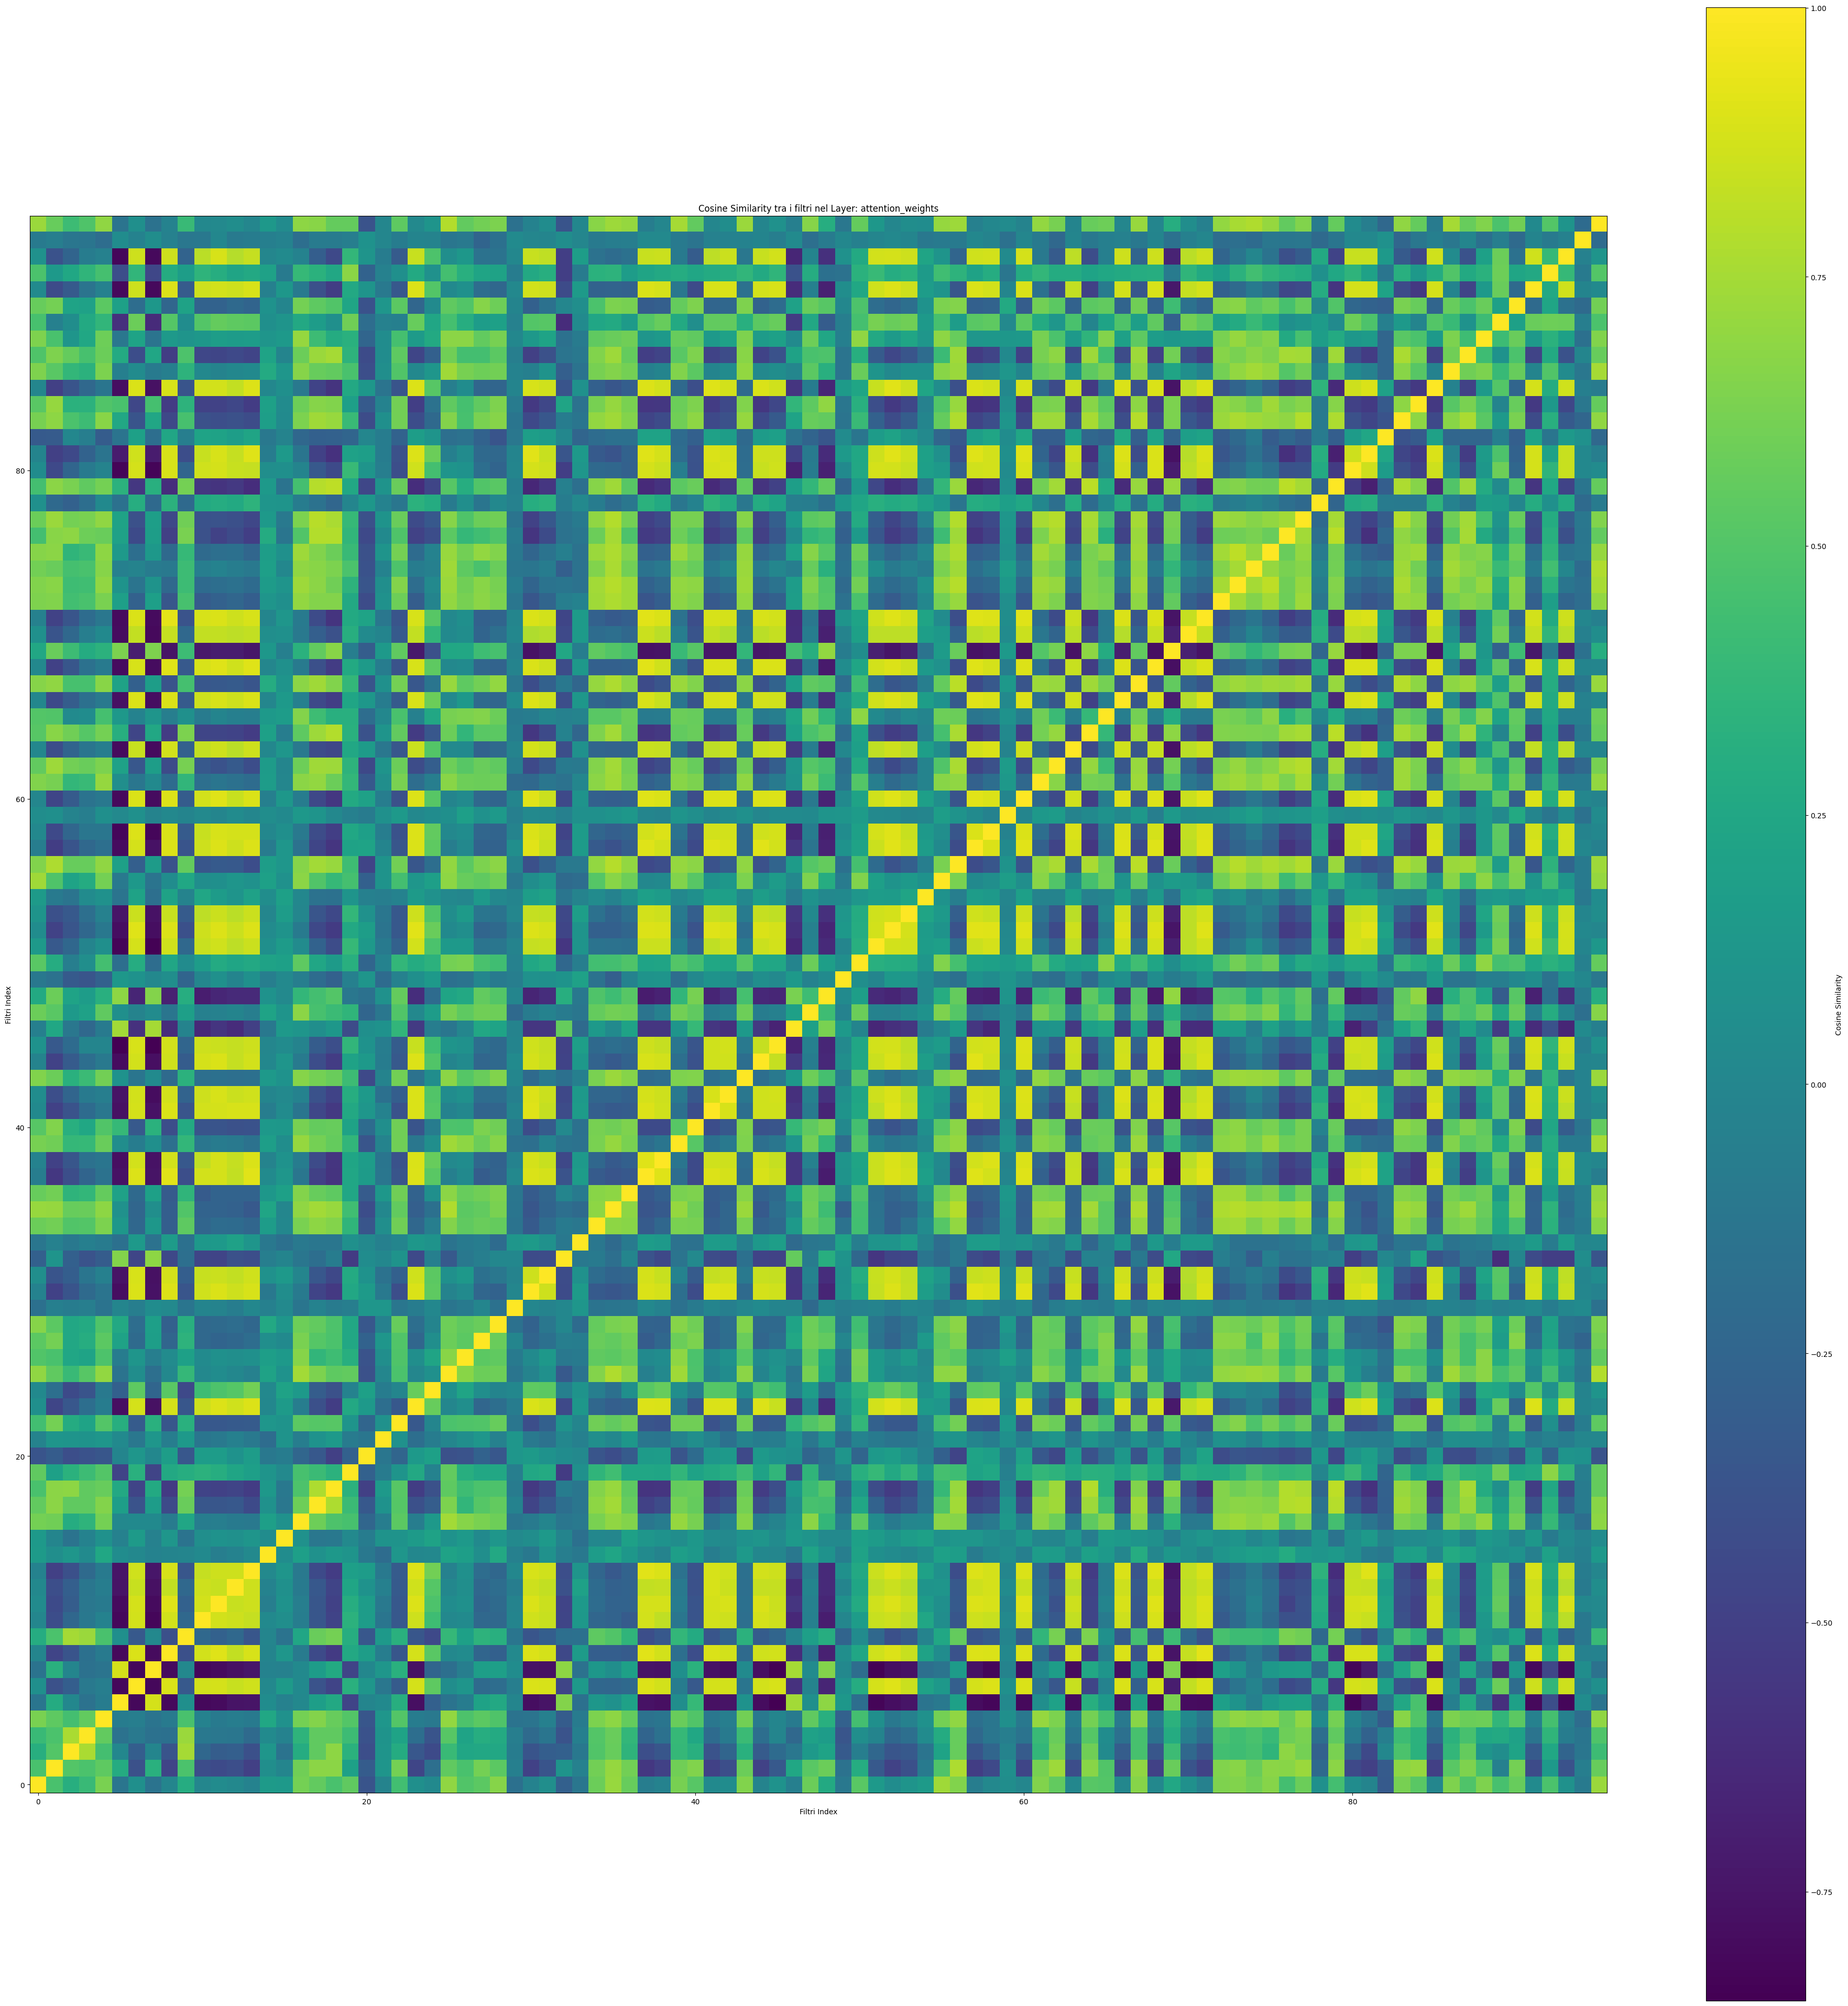

  Analisi di Somiglianza per 96 filtri.
  Somiglianza Cosinus Media (tra unità diverse): 0.1397
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Layer 6: multiply_attention (Tipo: Multiply) - Non ha parametri allenabili.

Layer 7: global_average_pooling_layer (Tipo: GlobalAveragePooling1D) - Non ha parametri allenabili.

Layer 8: dropout_layer (Tipo: Dropout) - Non ha parametri allenabili.

Analizzando il Layer: fc1 (Tipo: Dense)


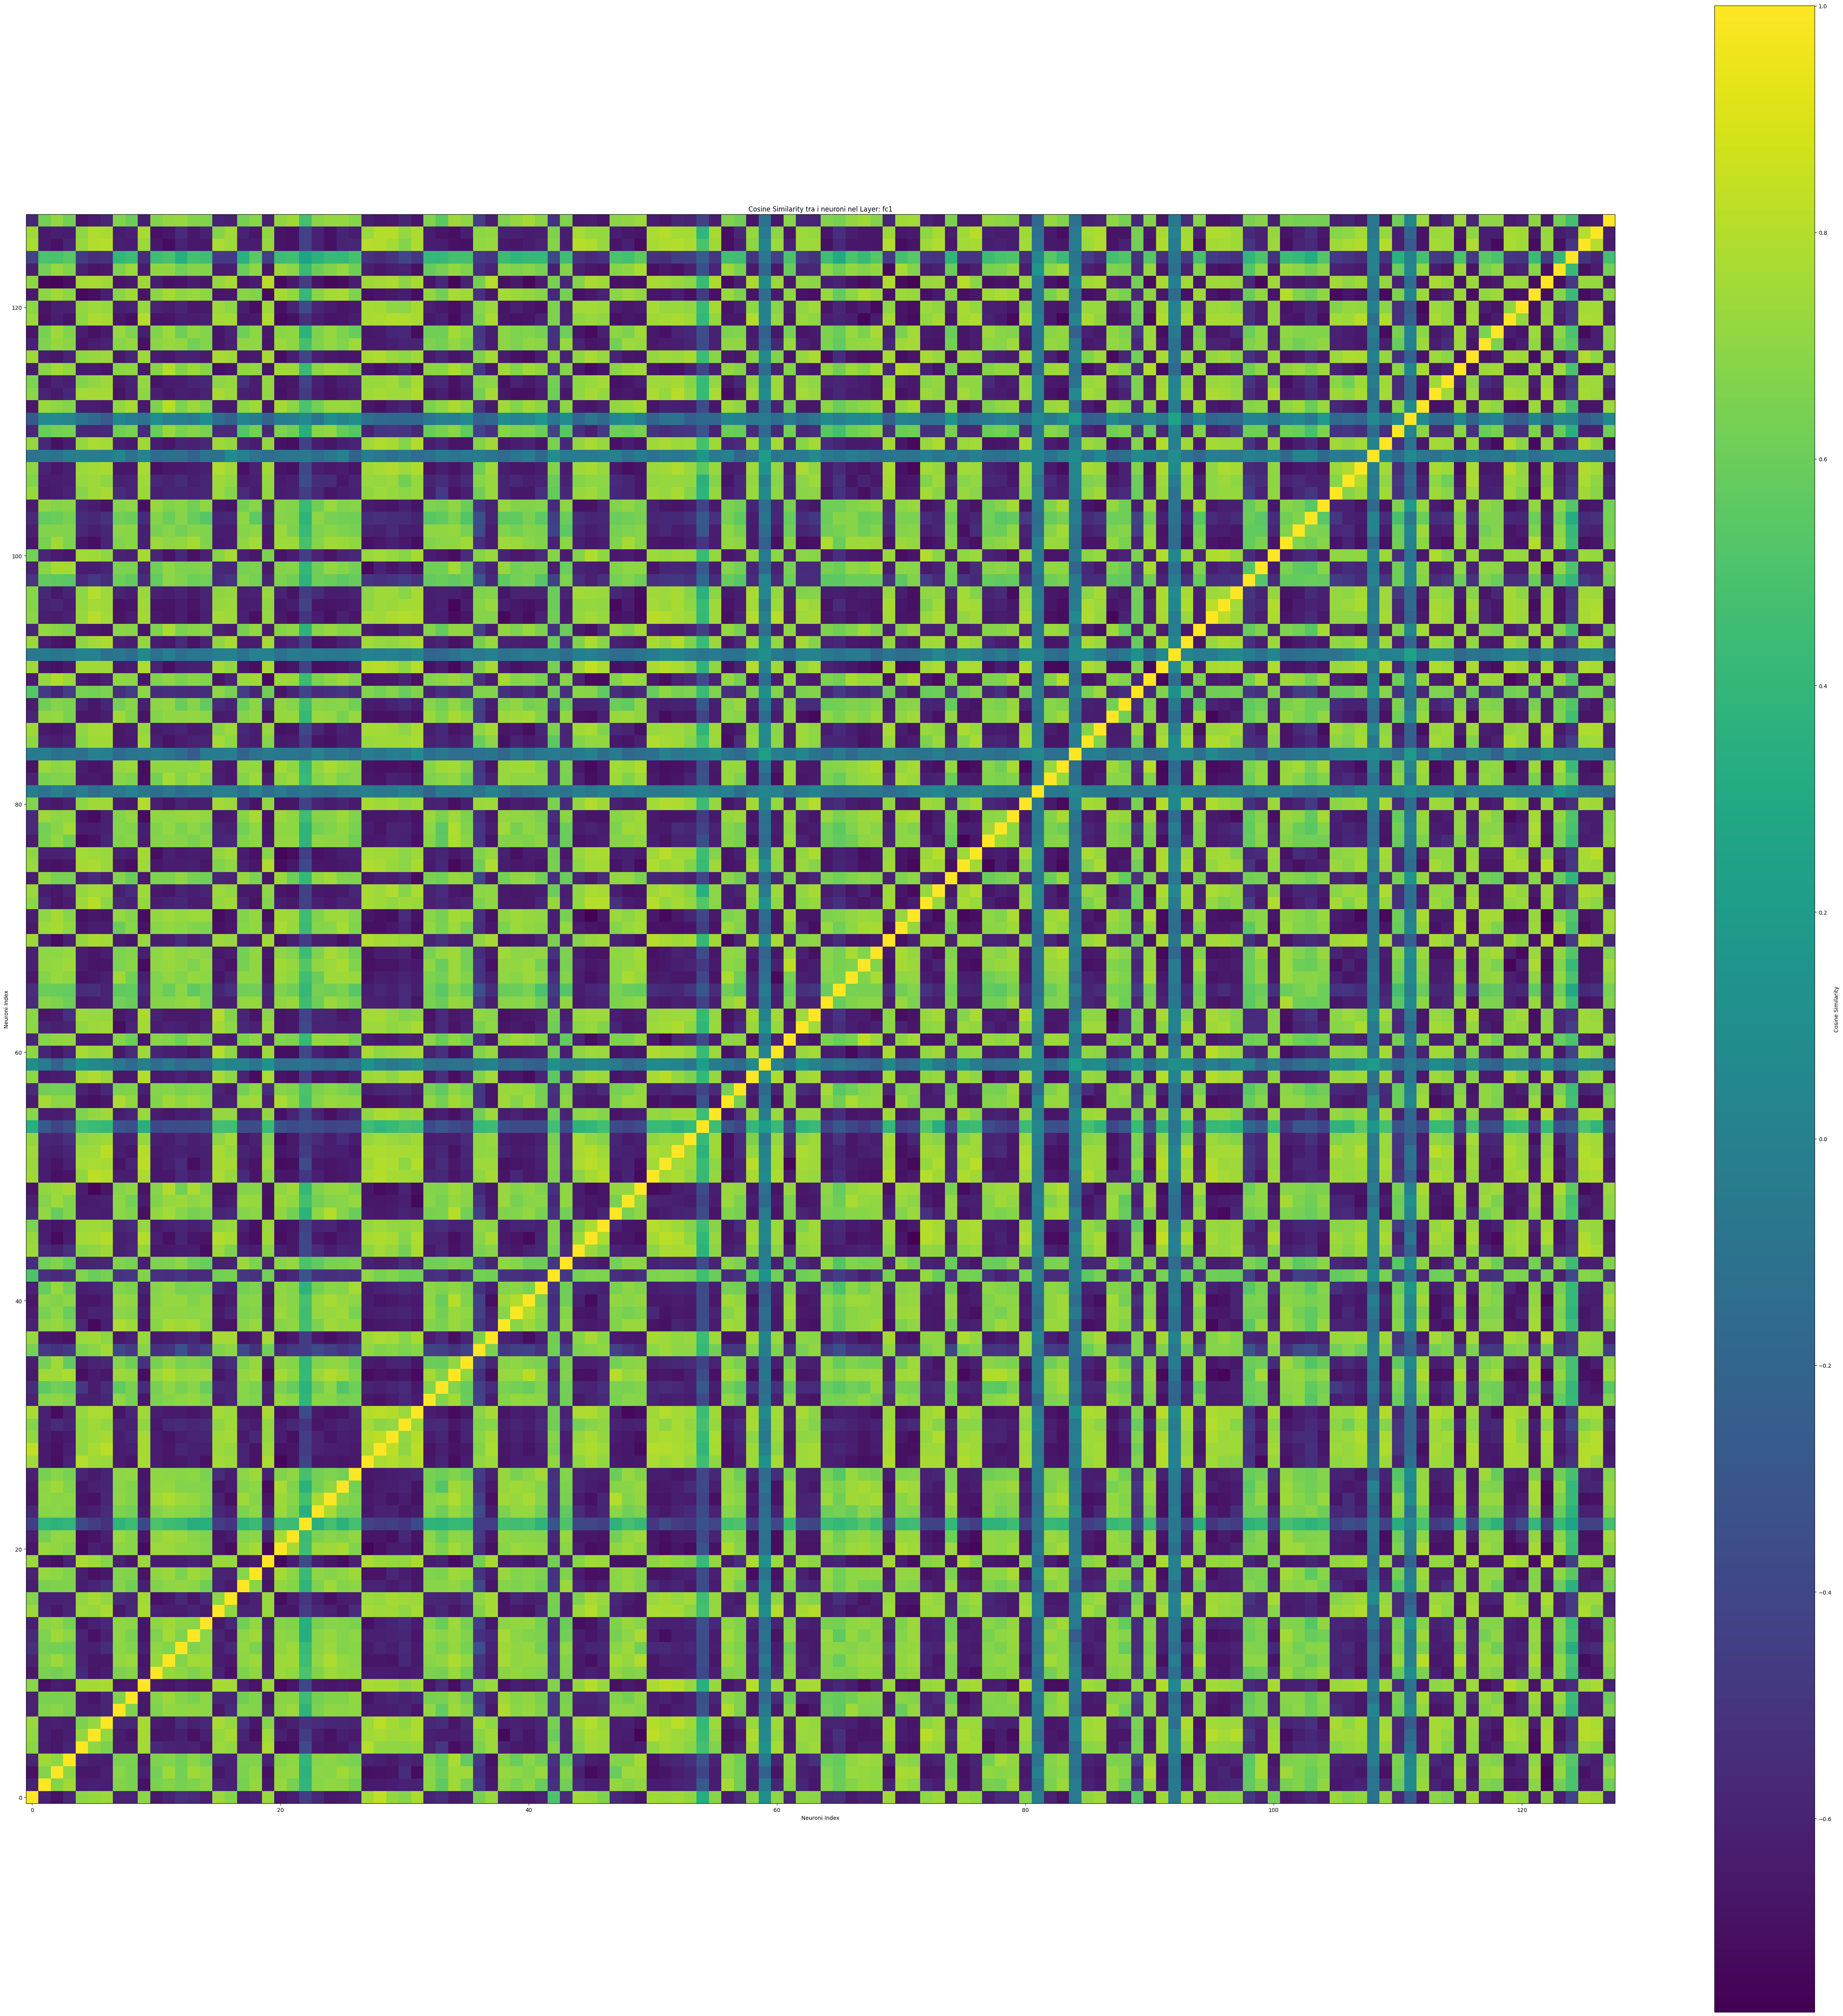

  Analisi di Somiglianza per 128 neuroni.
  Somiglianza Cosinus Media (tra unità diverse): 0.0265
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: output_softmax (Tipo: Dense)


/tmp/ipython-input-1-4211123086.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


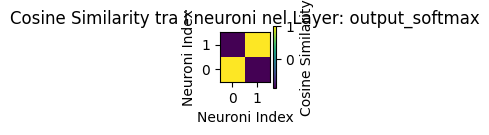

  Analisi di Somiglianza per 2 neuroni.
  Somiglianza Cosinus Media (tra unità diverse): -0.8730
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sklearn.metrics.pairwise import cosine_similarity

# --- Passo 1: Carica il modello .h5 su Colab ---
# Opzione A: Caricare da Google Drive (consigliato se il modello è lì)
# from google.colab import drive
# drive.mount('/content/drive')
# model_path = '/content/drive/My Drive/il_tuo_modello.h5'

# Opzione B: Caricare direttamente dal tuo computer locale (per file più piccoli)
print("Per favore, carica il tuo file .h5.")
from google.colab import files
uploaded = files.upload()
model_filename = list(uploaded.keys())[0]
model_path = model_filename

# --- Passo 2: Carica il modello .h5 in Keras ---
try:
    print(f"\nCaricamento del modello da: {model_path}...")
    model = load_model(model_path)
    print("Modello caricato con successo!")

    # --- Passo 3: Analisi di Somiglianza per Layer ---
    print("\n--- Analisi di Somiglianza dei Pesi all'interno di Ogni Layer ---")

    for i, layer in enumerate(model.layers):
        if len(layer.get_weights()) > 0:
            weights = layer.get_weights()[0] # Principalmente interessati ai pesi (kernel)

            # Per Layer Convoluzionali (Conv2D) e Densi (Dense)
            if 'Conv' in layer.__class__.__name__ or 'Dense' in layer.__class__.__name__:
                print(f"\nAnalizzando il Layer: {layer.name} (Tipo: {layer.__class__.__name__})")

                # Appiattisci i pesi per ogni filtro/neurone per calcolare la somiglianza
                # Per Conv2D: (altezza, larghezza, canali_input, num_filtri) -> reshape a (num_filtri, altezza*larghezza*canali_input)
                # Per Dense: (input_features, output_features) -> trasponi e reshape a (output_features, input_features)
                if 'Conv' in layer.__class__.__name__:
                    # Reshape per avere (num_filters, dimensione_appiattita_filtro)
                    # Es: (3,3,3,64) -> (64, 3*3*3)
                    flat_weights = weights.reshape(-1, weights.shape[-1]).T
                    num_units = weights.shape[-1] # Numero di filtri
                    unit_type = "filtri"
                elif 'Dense' in layer.__class__.__name__:
                    # Reshape per avere (num_output_neurons, num_input_connections)
                    # Es: (128, 64) -> (64, 128)
                    flat_weights = weights.T
                    num_units = weights.shape[-1] # Numero di neuroni di output
                    unit_type = "neuroni"

                if num_units > 1: # Ha senso calcolare la somiglianza solo se ci sono almeno 2 unità
                    # Calcola la matrice di somiglianza cosinus
                    # Aggiungi una piccola costante per evitare divisioni per zero se i vettori sono tutti zeri
                    similarity_matrix = cosine_similarity(flat_weights + 1e-8)

                    # Visualizza la heatmap
                    plt.figure(figsize=(num_units * 0.4, num_units * 0.4)) # Scala la dimensione del grafico
                    plt.imshow(similarity_matrix, cmap='viridis', origin='lower')
                    plt.colorbar(label='Cosine Similarity')
                    plt.title(f'Cosine Similarity tra i {unit_type} nel Layer: {layer.name}')
                    plt.xlabel(f'{unit_type.capitalize()} Index')
                    plt.ylabel(f'{unit_type.capitalize()} Index')
                    plt.grid(False) # Di solito le heatmap non hanno griglia
                    plt.tight_layout()
                    plt.show()

                    print(f"  Analisi di Somiglianza per {num_units} {unit_type}.")
                    # Puoi anche calcolare la media della somiglianza fuori dalla diagonale
                    # per avere un'idea generale di quanto siano simili
                    np.fill_diagonal(similarity_matrix, np.nan) # Ignora la somiglianza con se stesso (sempre 1)
                    mean_similarity = np.nanmean(similarity_matrix)
                    print(f"  Somiglianza Cosinus Media (tra unità diverse): {mean_similarity:.4f}")
                    if mean_similarity > 0.8:
                        print("  (Alto valore: i pesi di questo layer tendono ad essere molto simili tra loro, potenziale ridondanza)")
                    elif mean_similarity < 0.2:
                        print("  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)")
                else:
                    print(f"  Il layer {layer.name} ha solo 1 {unit_type}, nessuna somiglianza da calcolare tra unità.")

            else:
                print(f"\nLayer: {layer.name} (Tipo: {layer.__class__.__name__}) - Tipo di layer non adatto per analisi di somiglianza tra filtri/neuroni.")

        else:
            print(f"\nLayer {i+1}: {layer.name} (Tipo: {layer.__class__.__name__}) - Non ha parametri allenabili.")


except Exception as e:
    print(f"\nErrore durante il caricamento o l'analisi dei pesi del modello: {e}")
    print("Assicurati che il file sia un modello Keras valido in formato .h5 e che il percorso sia corretto.")
    print("Controlla anche la versione di TensorFlow/Keras con cui è stato salvato il modello.")

Per favore, carica il tuo file .h5.


Saving TwoConv1D_MaxPool_Attention-50-BETA_awgn_UNIFORM_snr_0-20.h5 to TwoConv1D_MaxPool_Attention-50-BETA_awgn_UNIFORM_snr_0-20.h5

Caricamento del modello da: TwoConv1D_MaxPool_Attention-50-BETA_awgn_UNIFORM_snr_0-20.h5...


Modello caricato con successo!

--- Analisi di Somiglianza dei Pesi all'interno di Ogni Layer ---

Layer 1: input_layer_43 (Tipo: InputLayer) - Non ha parametri allenabili.

Layer 2: reshape_43 (Tipo: Reshape) - Non ha parametri allenabili.

Analizzando il Layer: conv1d_79 (Tipo: Conv1D)


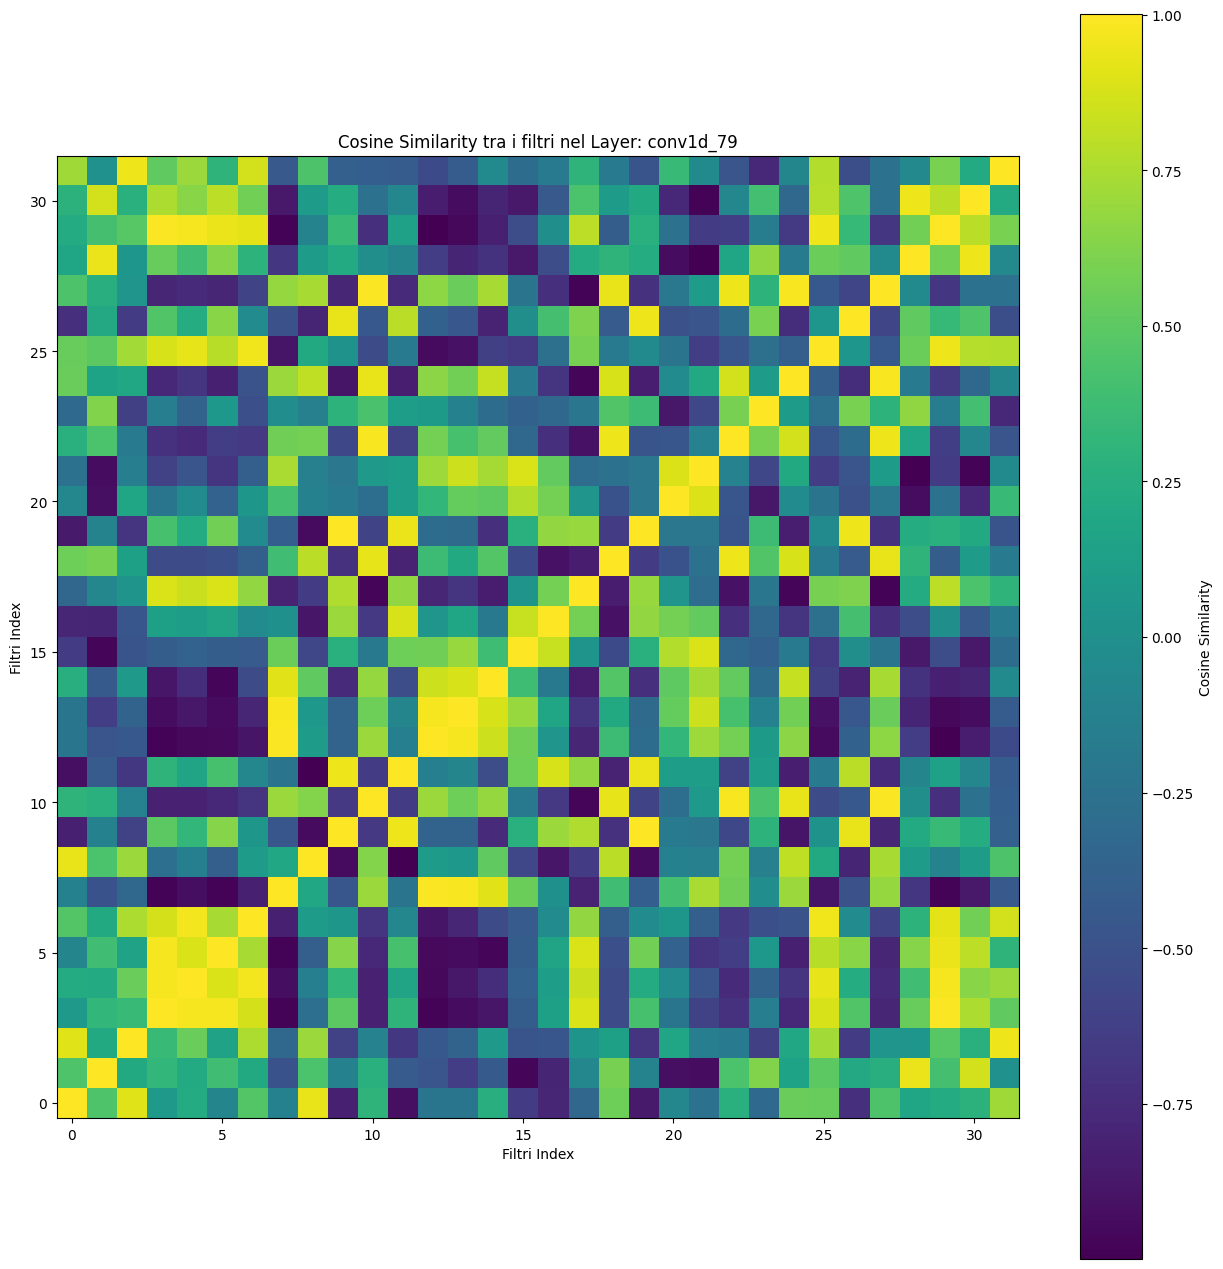

  Analisi di Somiglianza per 32 filtri.
  Somiglianza Cosinus Media (tra unità diverse): -0.0243
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: conv1d_80 (Tipo: Conv1D)


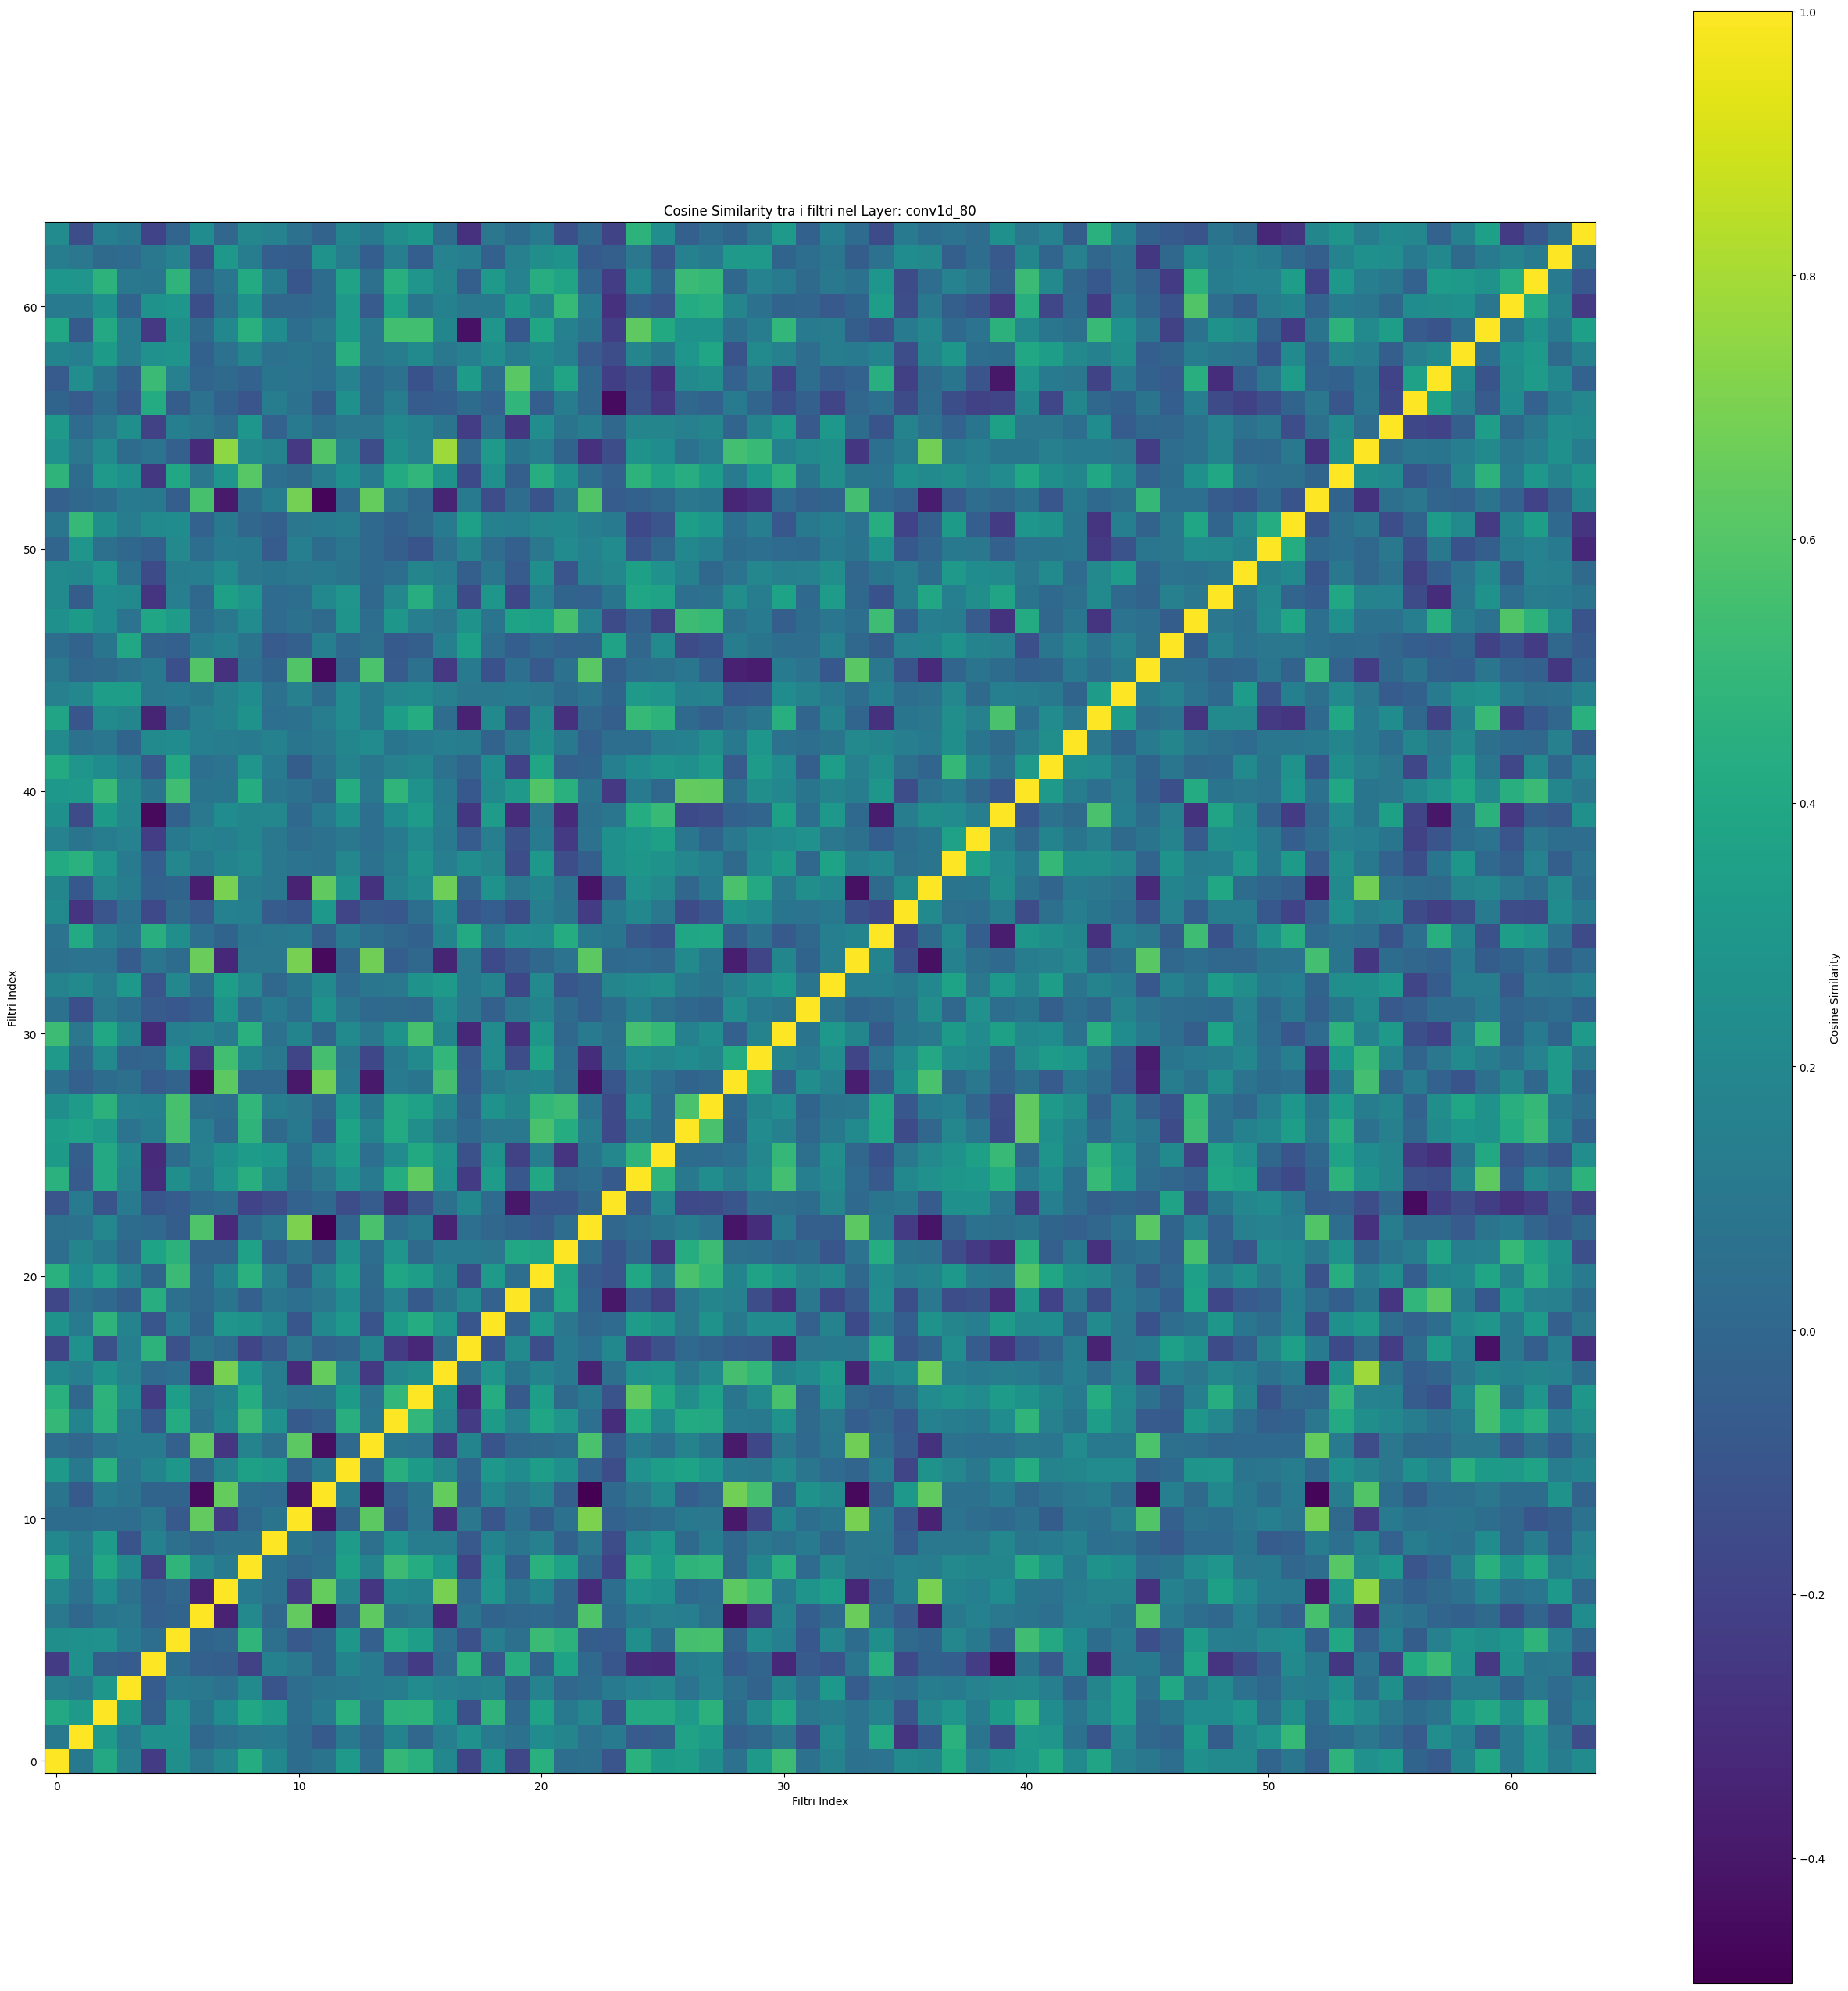

  Analisi di Somiglianza per 64 filtri.
  Somiglianza Cosinus Media (tra unità diverse): 0.1124
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: conv1d_81 (Tipo: Conv1D)
  Il layer conv1d_81 ha solo 1 filtri, nessuna somiglianza da calcolare tra unità.

Layer 6: multiply_23 (Tipo: Multiply) - Non ha parametri allenabili.

Layer 7: max_pooling1d_24 (Tipo: MaxPooling1D) - Non ha parametri allenabili.

Layer 8: flatten_24 (Tipo: Flatten) - Non ha parametri allenabili.

Layer 9: dropout_43 (Tipo: Dropout) - Non ha parametri allenabili.

Analizzando il Layer: dense_91 (Tipo: Dense)


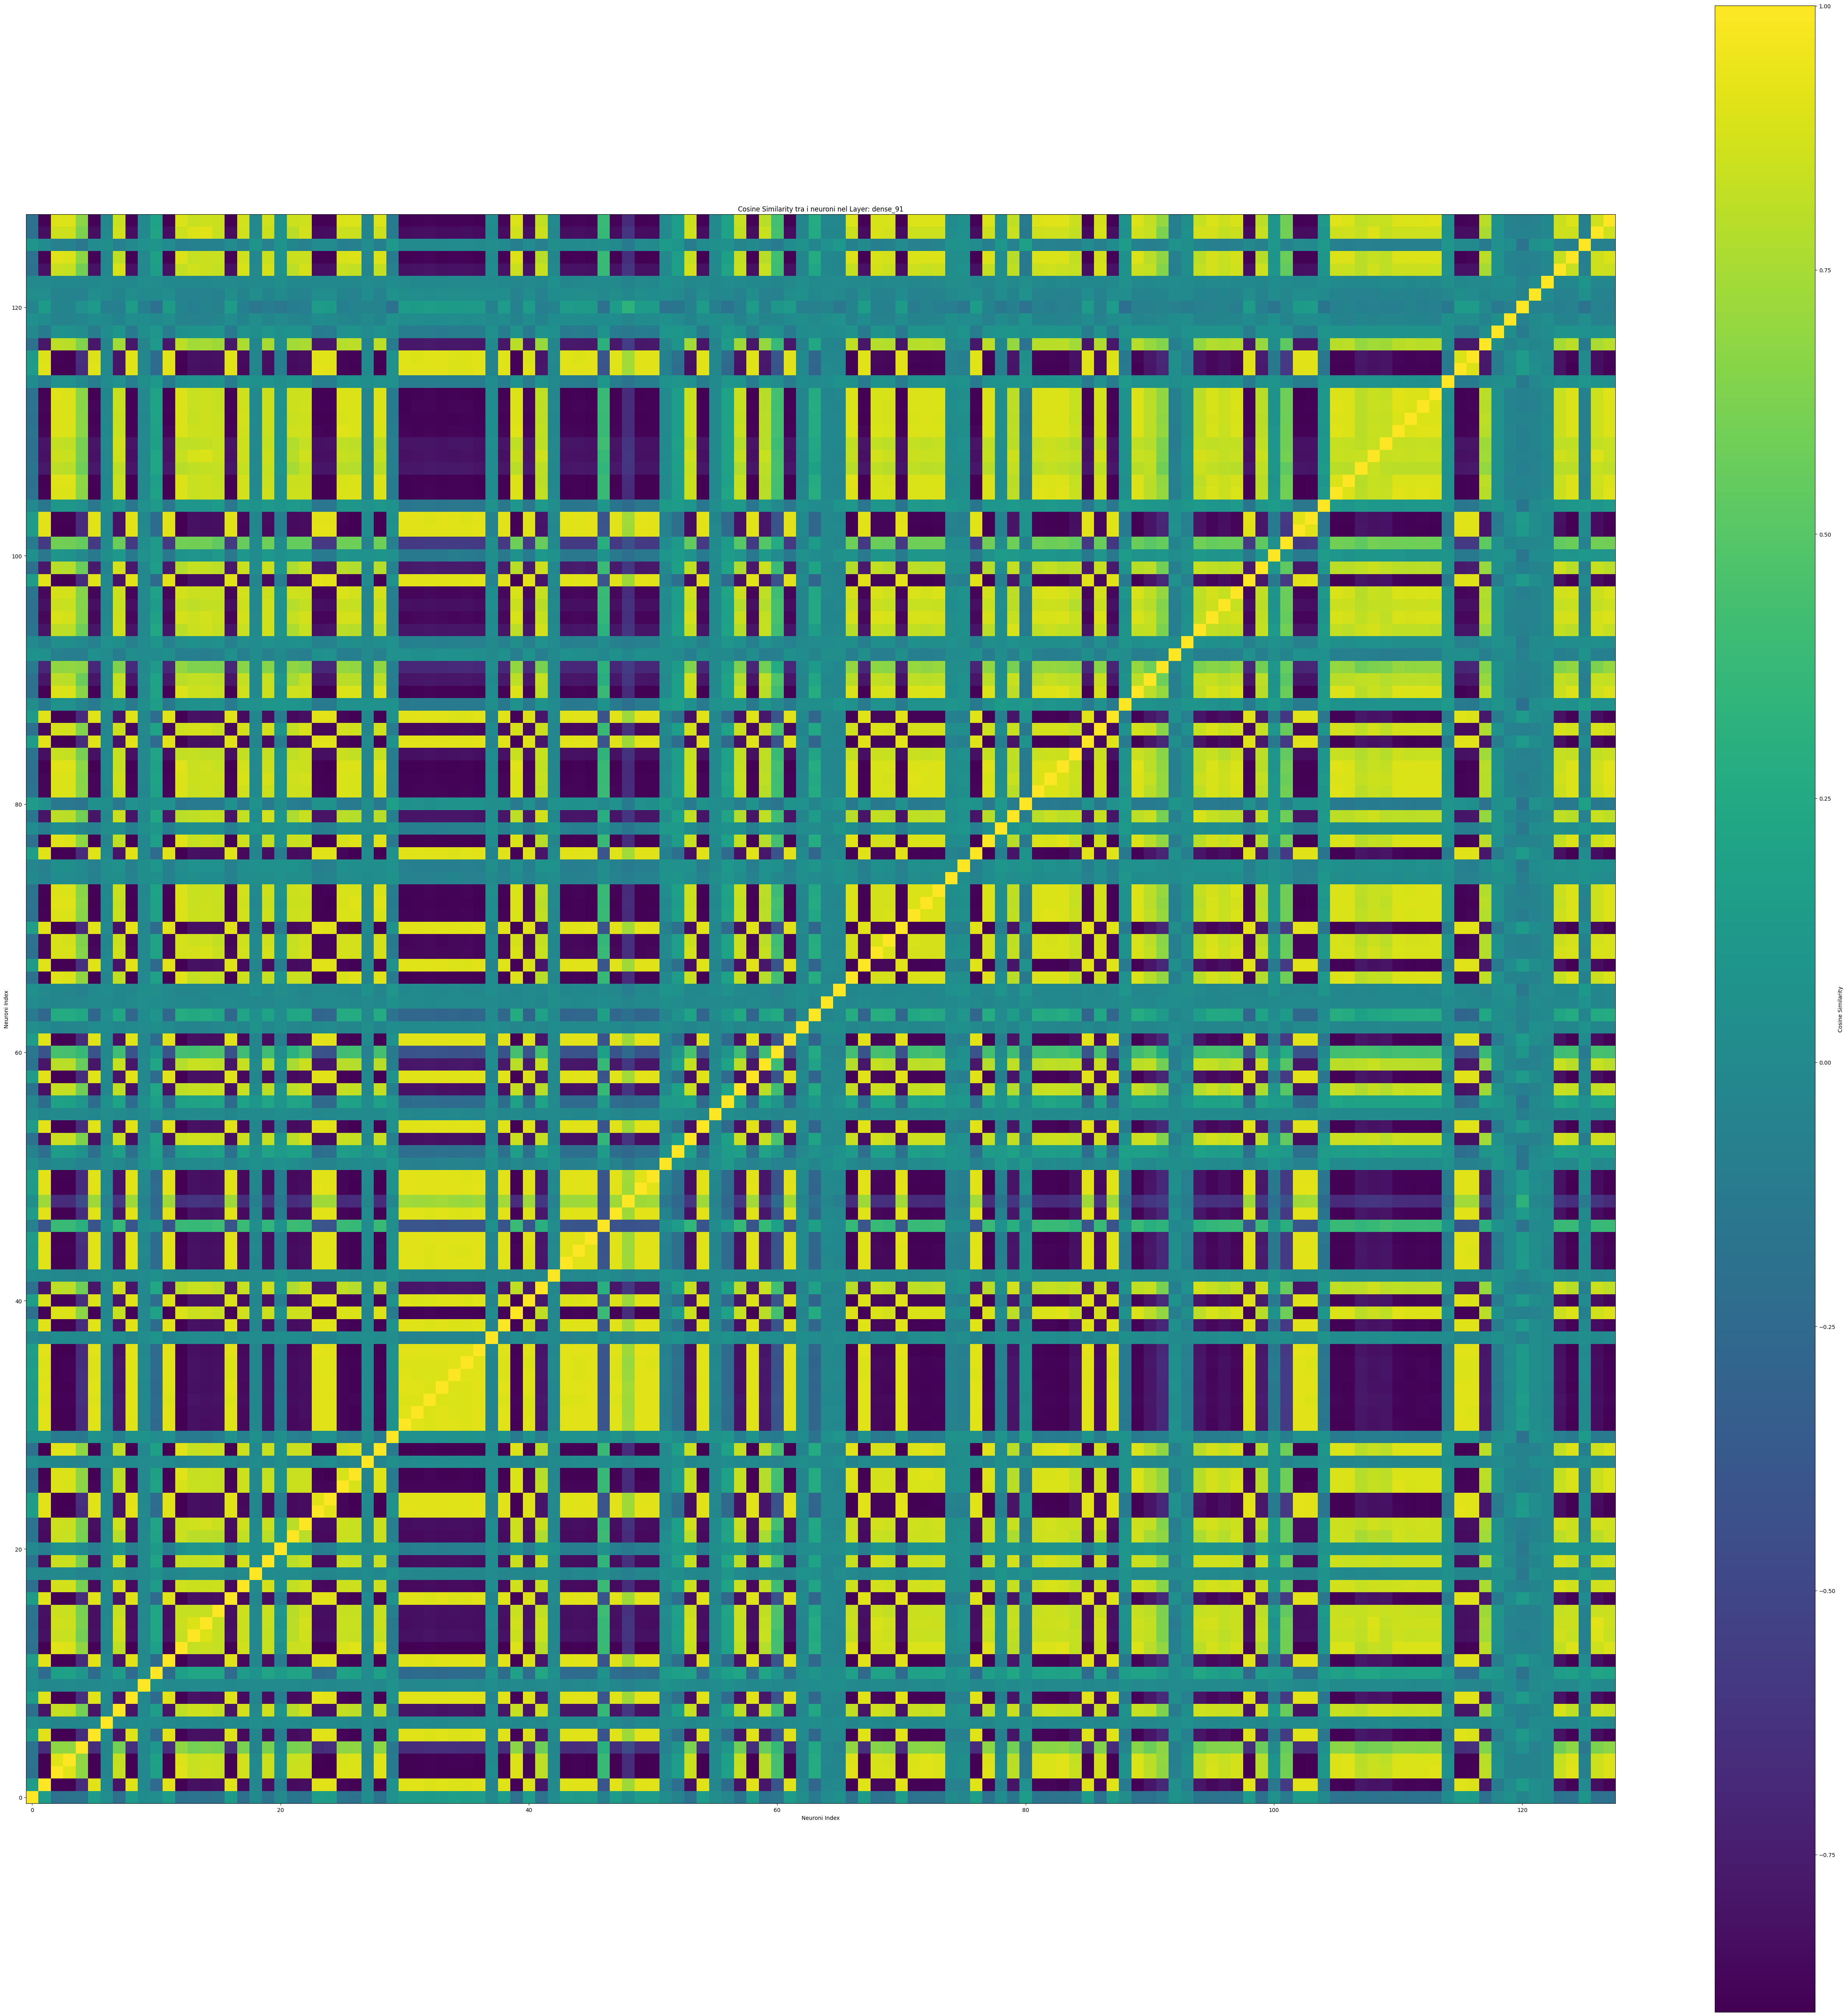

  Analisi di Somiglianza per 128 neuroni.
  Somiglianza Cosinus Media (tra unità diverse): 0.0216
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: dense_92 (Tipo: Dense)


/tmp/ipython-input-1-4211123086.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


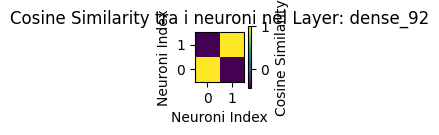

  Analisi di Somiglianza per 2 neuroni.
  Somiglianza Cosinus Media (tra unità diverse): -0.4370
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sklearn.metrics.pairwise import cosine_similarity

# --- Passo 1: Carica il modello .h5 su Colab ---
# Opzione A: Caricare da Google Drive (consigliato se il modello è lì)
# from google.colab import drive
# drive.mount('/content/drive')
# model_path = '/content/drive/My Drive/il_tuo_modello.h5'

# Opzione B: Caricare direttamente dal tuo computer locale (per file più piccoli)
print("Per favore, carica il tuo file .h5.")
from google.colab import files
uploaded = files.upload()
model_filename = list(uploaded.keys())[0]
model_path = model_filename

# --- Passo 2: Carica il modello .h5 in Keras ---
try:
    print(f"\nCaricamento del modello da: {model_path}...")
    model = load_model(model_path)
    print("Modello caricato con successo!")

    # --- Passo 3: Analisi di Somiglianza per Layer ---
    print("\n--- Analisi di Somiglianza dei Pesi all'interno di Ogni Layer ---")

    for i, layer in enumerate(model.layers):
        if len(layer.get_weights()) > 0:
            weights = layer.get_weights()[0] # Principalmente interessati ai pesi (kernel)

            # Per Layer Convoluzionali (Conv2D) e Densi (Dense)
            if 'Conv' in layer.__class__.__name__ or 'Dense' in layer.__class__.__name__:
                print(f"\nAnalizzando il Layer: {layer.name} (Tipo: {layer.__class__.__name__})")

                # Appiattisci i pesi per ogni filtro/neurone per calcolare la somiglianza
                # Per Conv2D: (altezza, larghezza, canali_input, num_filtri) -> reshape a (num_filtri, altezza*larghezza*canali_input)
                # Per Dense: (input_features, output_features) -> trasponi e reshape a (output_features, input_features)
                if 'Conv' in layer.__class__.__name__:
                    # Reshape per avere (num_filters, dimensione_appiattita_filtro)
                    # Es: (3,3,3,64) -> (64, 3*3*3)
                    flat_weights = weights.reshape(-1, weights.shape[-1]).T
                    num_units = weights.shape[-1] # Numero di filtri
                    unit_type = "filtri"
                elif 'Dense' in layer.__class__.__name__:
                    # Reshape per avere (num_output_neurons, num_input_connections)
                    # Es: (128, 64) -> (64, 128)
                    flat_weights = weights.T
                    num_units = weights.shape[-1] # Numero di neuroni di output
                    unit_type = "neuroni"

                if num_units > 1: # Ha senso calcolare la somiglianza solo se ci sono almeno 2 unità
                    # Calcola la matrice di somiglianza cosinus
                    # Aggiungi una piccola costante per evitare divisioni per zero se i vettori sono tutti zeri
                    similarity_matrix = cosine_similarity(flat_weights + 1e-8)

                    # Visualizza la heatmap
                    plt.figure(figsize=(num_units * 0.4, num_units * 0.4)) # Scala la dimensione del grafico
                    plt.imshow(similarity_matrix, cmap='viridis', origin='lower')
                    plt.colorbar(label='Cosine Similarity')
                    plt.title(f'Cosine Similarity tra i {unit_type} nel Layer: {layer.name}')
                    plt.xlabel(f'{unit_type.capitalize()} Index')
                    plt.ylabel(f'{unit_type.capitalize()} Index')
                    plt.grid(False) # Di solito le heatmap non hanno griglia
                    plt.tight_layout()
                    plt.show()

                    print(f"  Analisi di Somiglianza per {num_units} {unit_type}.")
                    # Puoi anche calcolare la media della somiglianza fuori dalla diagonale
                    # per avere un'idea generale di quanto siano simili
                    np.fill_diagonal(similarity_matrix, np.nan) # Ignora la somiglianza con se stesso (sempre 1)
                    mean_similarity = np.nanmean(similarity_matrix)
                    print(f"  Somiglianza Cosinus Media (tra unità diverse): {mean_similarity:.4f}")
                    if mean_similarity > 0.8:
                        print("  (Alto valore: i pesi di questo layer tendono ad essere molto simili tra loro, potenziale ridondanza)")
                    elif mean_similarity < 0.2:
                        print("  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)")
                else:
                    print(f"  Il layer {layer.name} ha solo 1 {unit_type}, nessuna somiglianza da calcolare tra unità.")

            else:
                print(f"\nLayer: {layer.name} (Tipo: {layer.__class__.__name__}) - Tipo di layer non adatto per analisi di somiglianza tra filtri/neuroni.")

        else:
            print(f"\nLayer {i+1}: {layer.name} (Tipo: {layer.__class__.__name__}) - Non ha parametri allenabili.")


except Exception as e:
    print(f"\nErrore durante il caricamento o l'analisi dei pesi del modello: {e}")
    print("Assicurati che il file sia un modello Keras valido in formato .h5 e che il percorso sia corretto.")
    print("Controlla anche la versione di TensorFlow/Keras con cui è stato salvato il modello.")

Per favore, carica il tuo file .h5.


Saving TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_0-20.h5 to TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_0-20.h5

Caricamento del modello da: TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_0-20.h5...
Modello caricato con successo!

--- Analisi di Somiglianza dei Pesi all'interno di Ogni Layer ---

Layer 1: input_layer_8 (Tipo: InputLayer) - Non ha parametri allenabili.

Layer 2: reshape_for_conv (Tipo: Reshape) - Non ha parametri allenabili.

Analizzando il Layer: conv1d_layer_1 (Tipo: Conv1D)


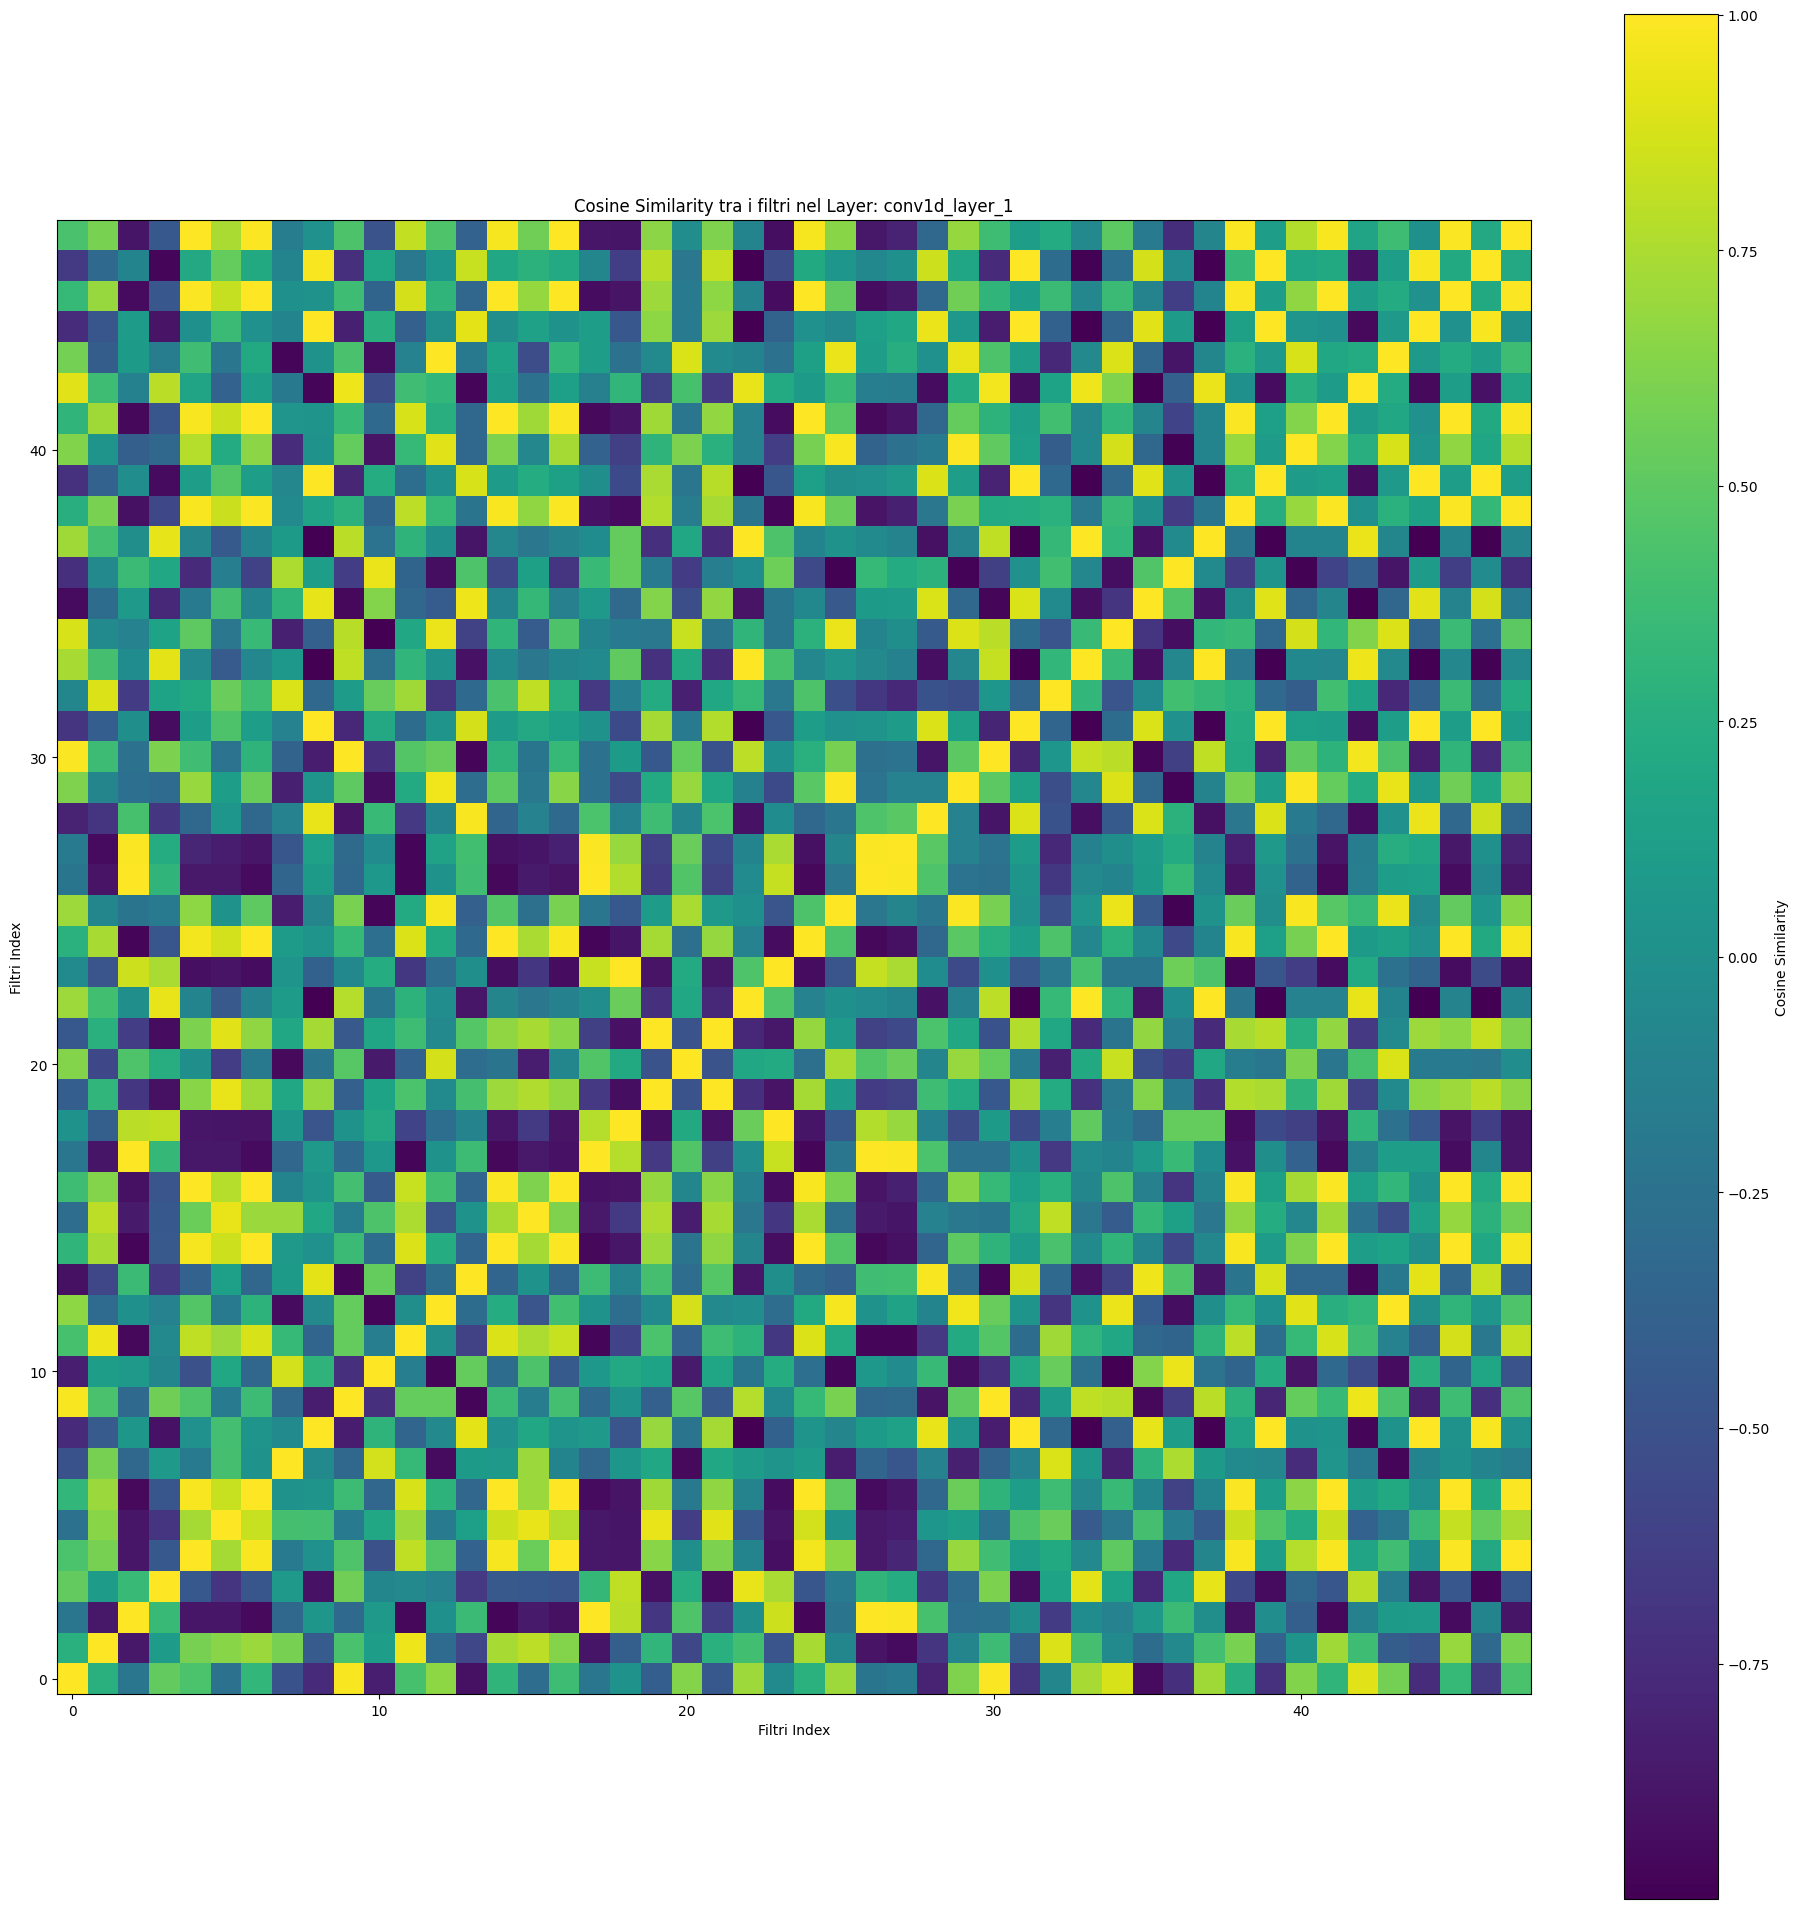

  Analisi di Somiglianza per 48 filtri.
  Somiglianza Cosinus Media (tra unità diverse): 0.0258
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: conv1d_layer_2 (Tipo: Conv1D)


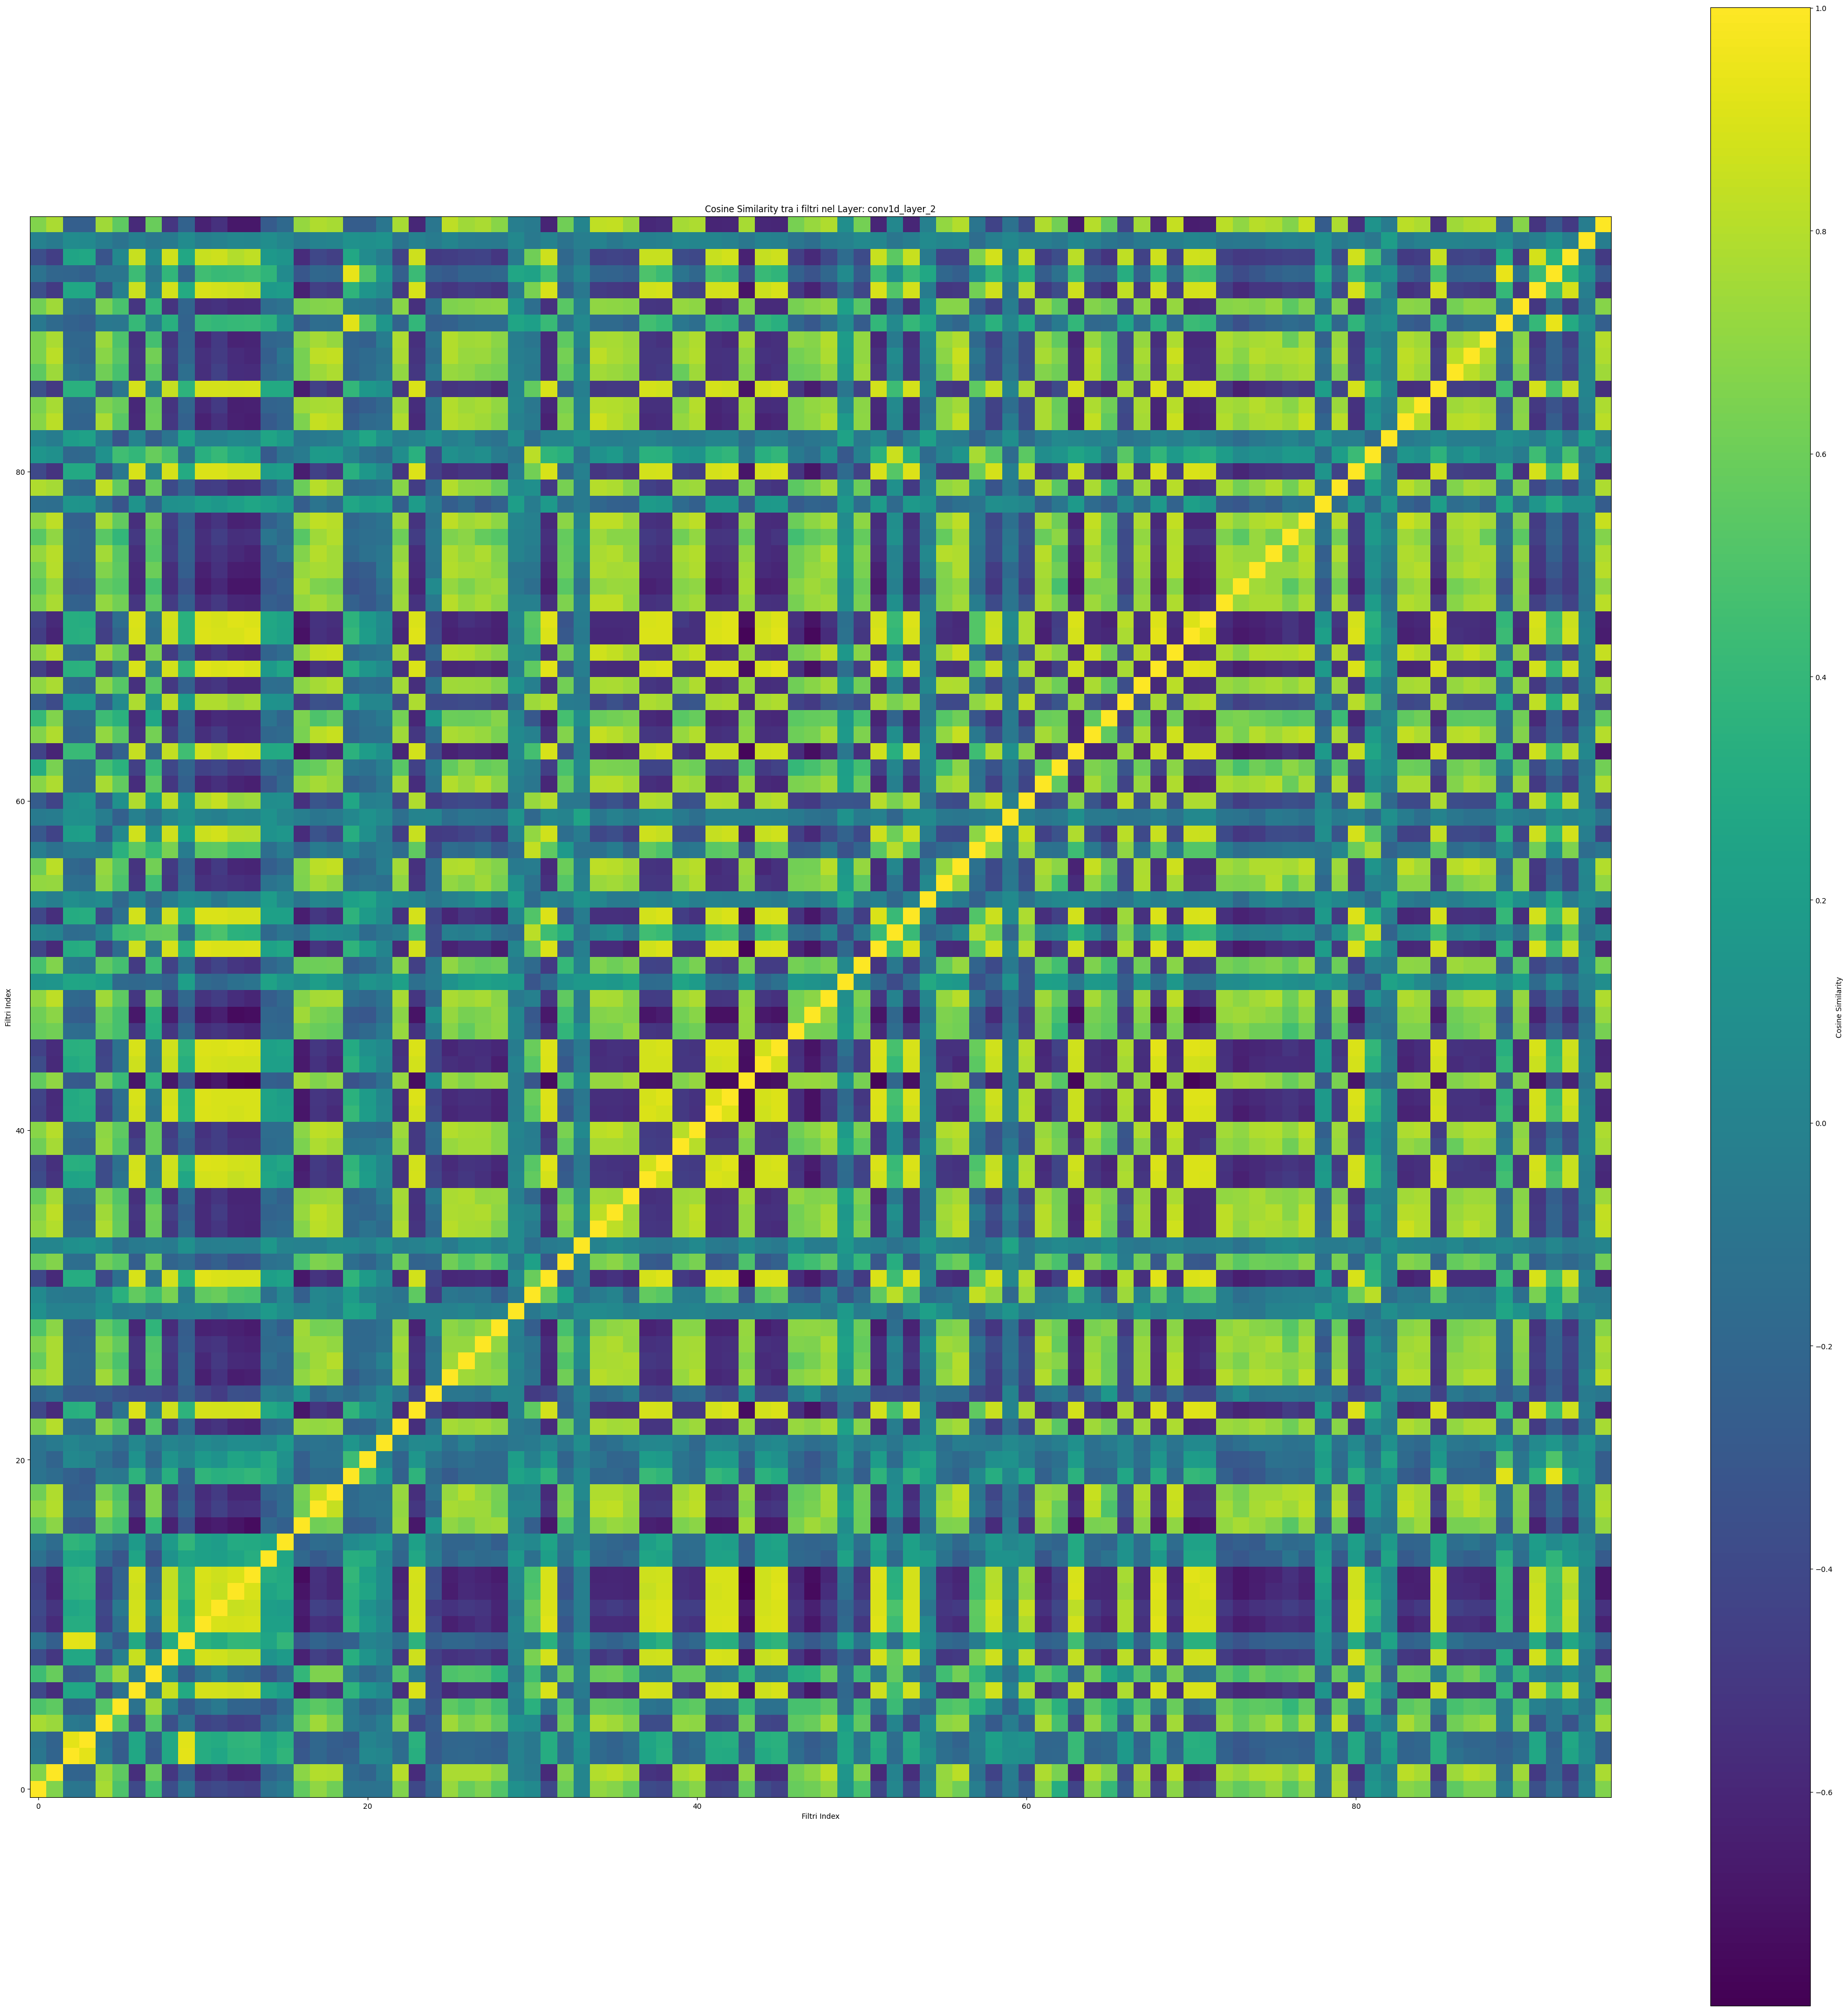

  Analisi di Somiglianza per 96 filtri.
  Somiglianza Cosinus Media (tra unità diverse): 0.0919
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: attention_weights (Tipo: Conv1D)


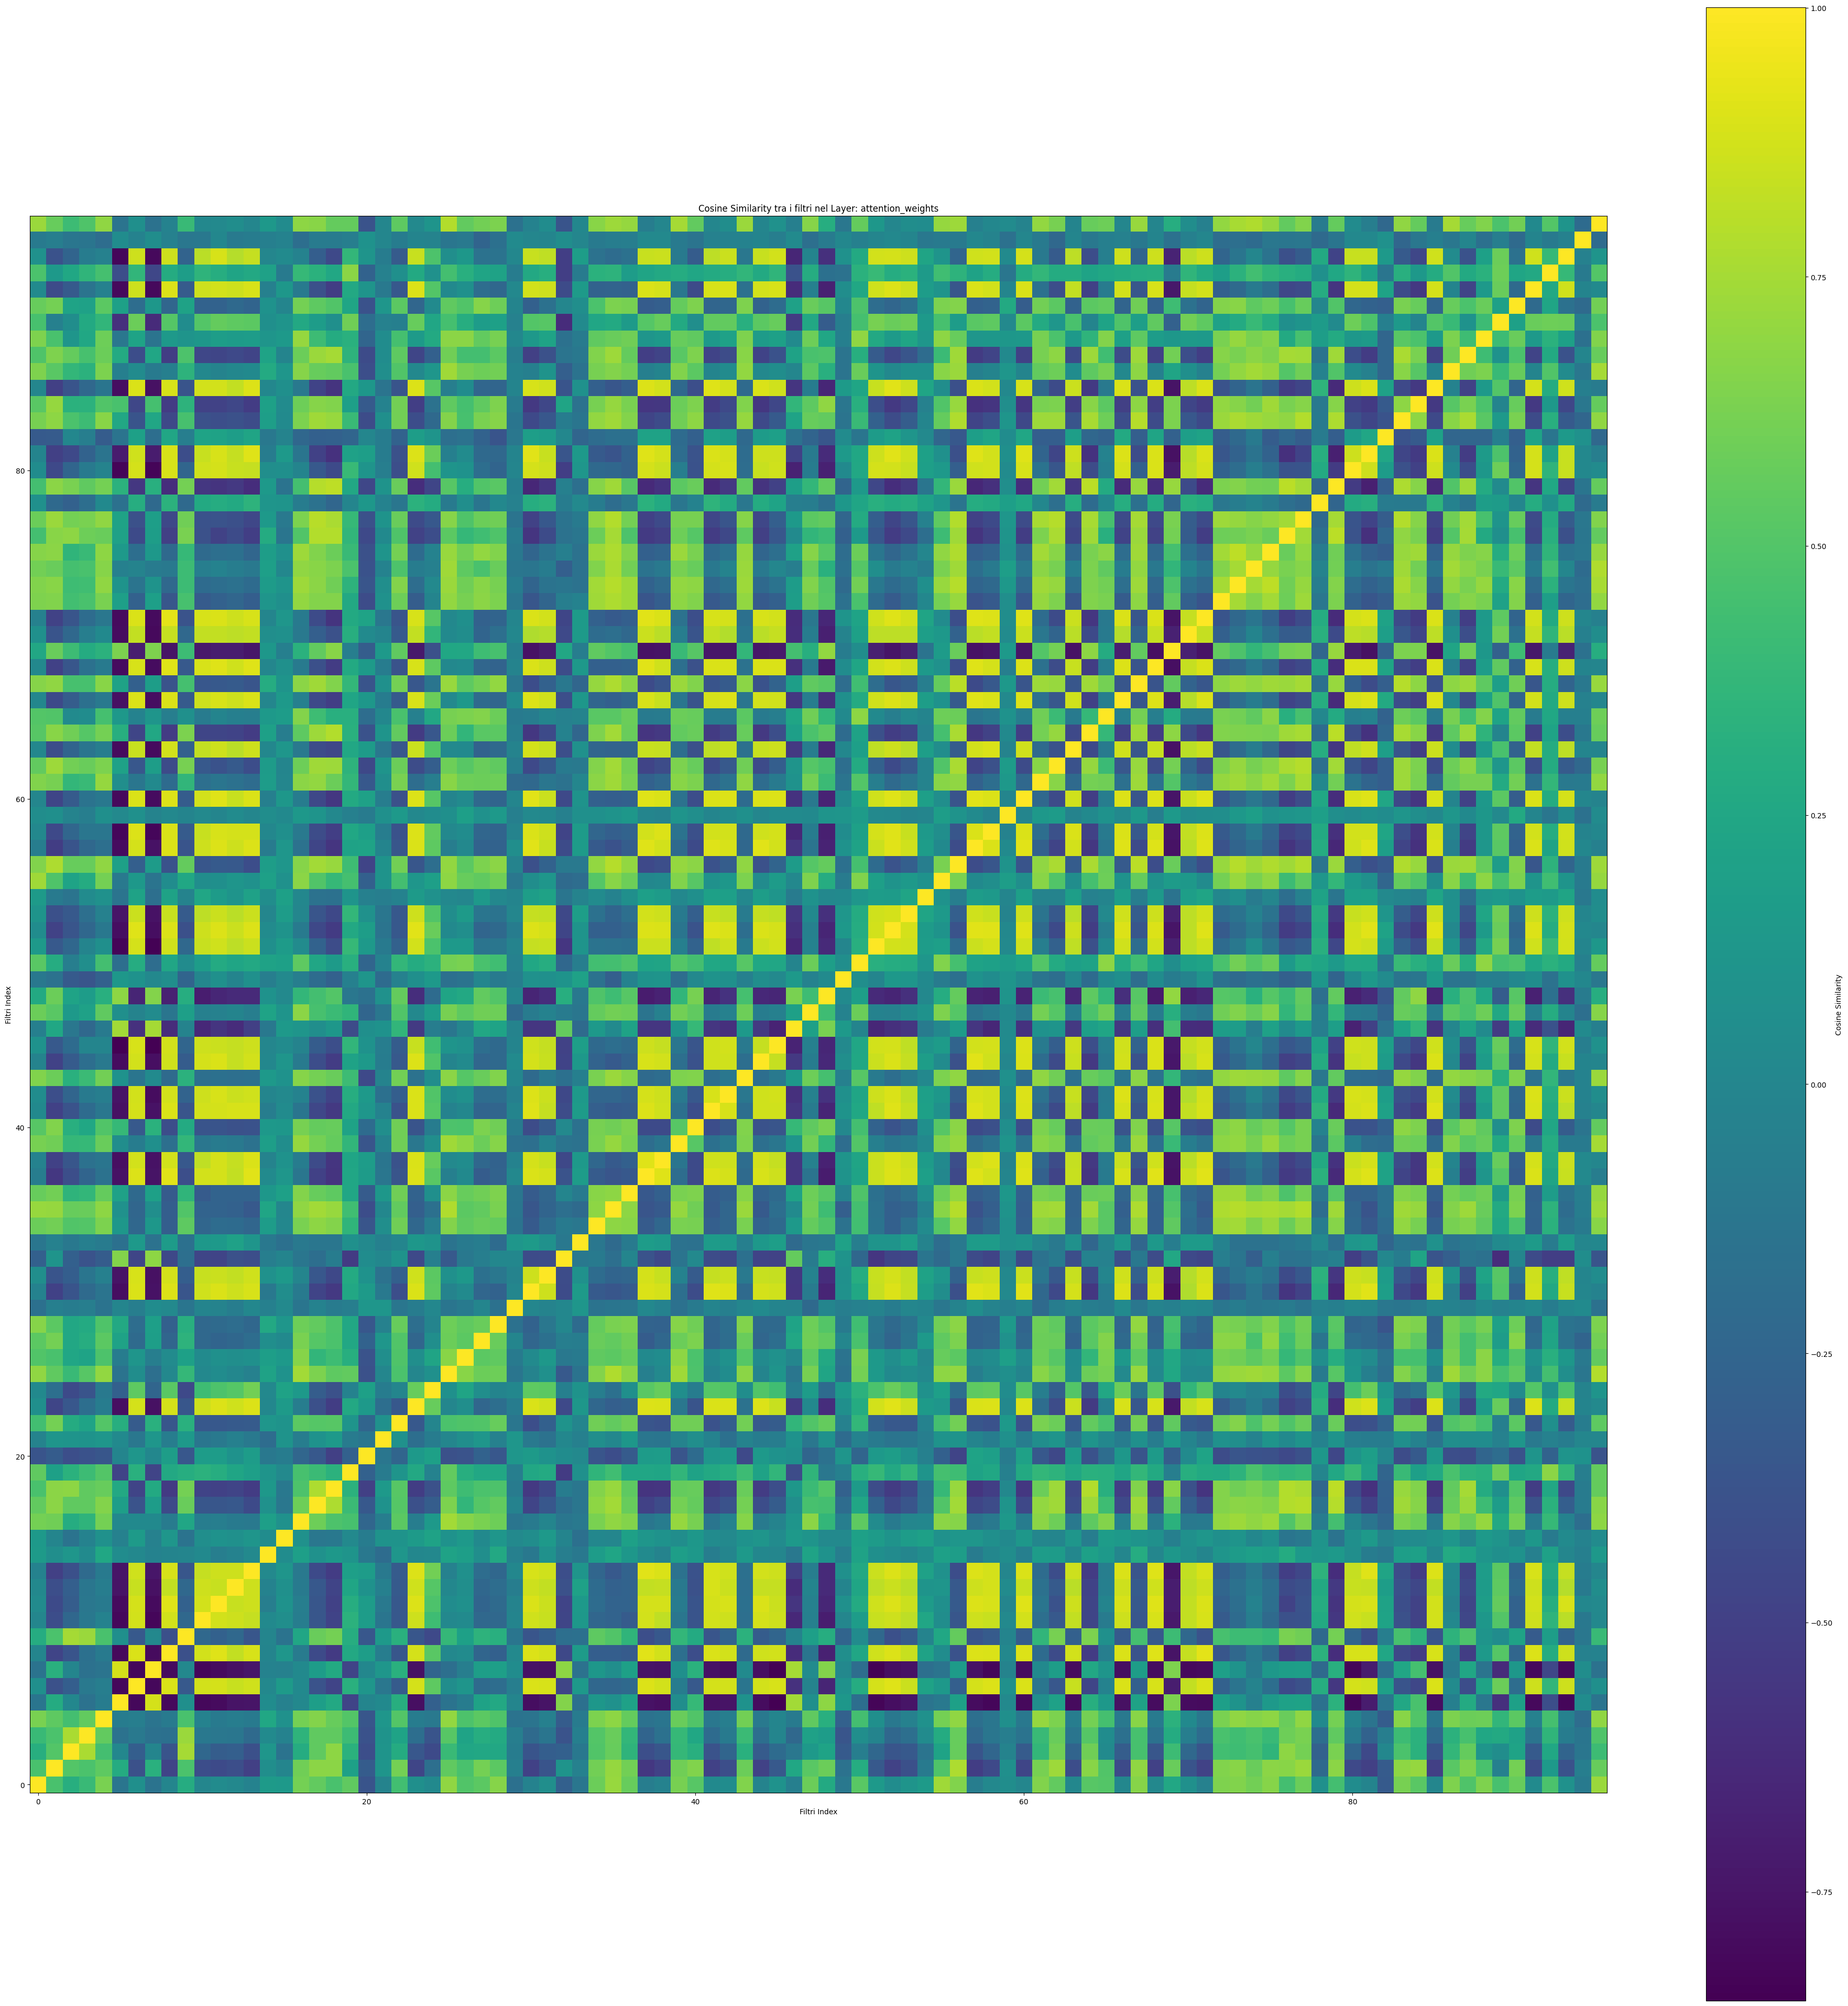

  Analisi di Somiglianza per 96 filtri.
  Somiglianza Cosinus Media (tra unità diverse): 0.1397
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Layer 6: multiply_attention (Tipo: Multiply) - Non ha parametri allenabili.

Layer 7: global_average_pooling_layer (Tipo: GlobalAveragePooling1D) - Non ha parametri allenabili.

Layer 8: dropout_layer (Tipo: Dropout) - Non ha parametri allenabili.

Analizzando il Layer: fc1 (Tipo: Dense)


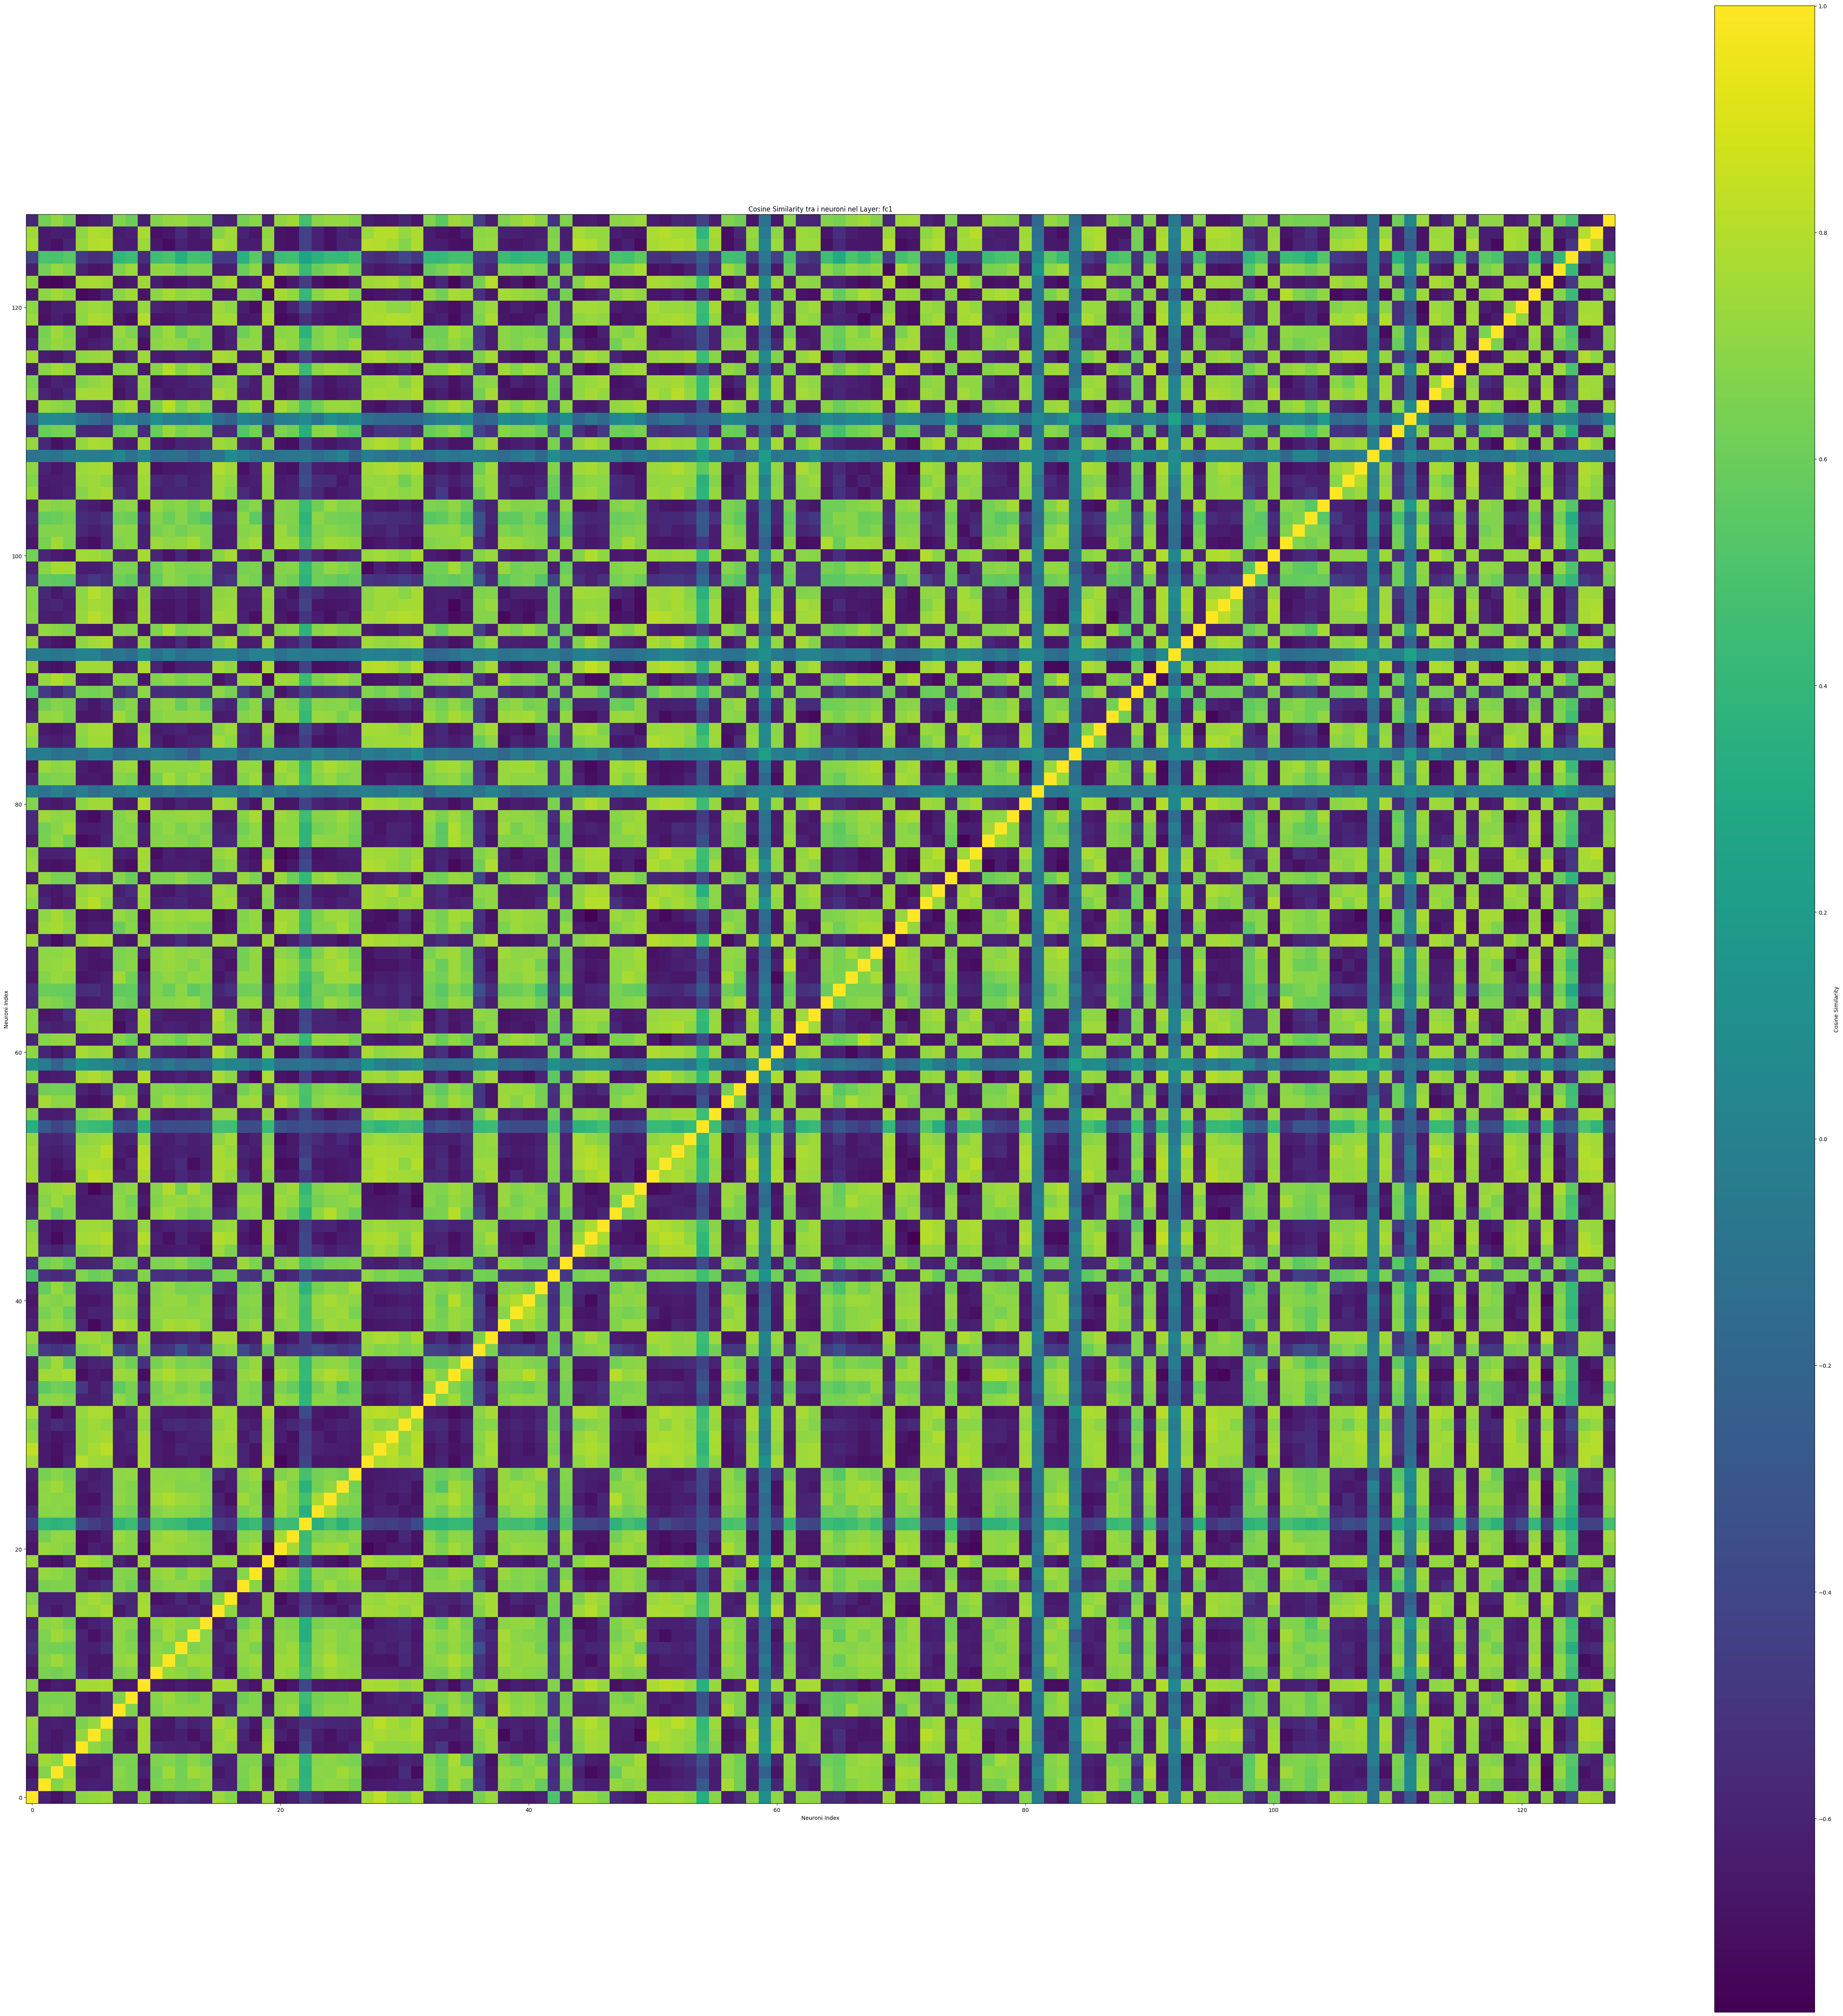

  Analisi di Somiglianza per 128 neuroni.
  Somiglianza Cosinus Media (tra unità diverse): 0.0265
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)

Analizzando il Layer: output_softmax (Tipo: Dense)


/tmp/ipython-input-7-4211123086.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


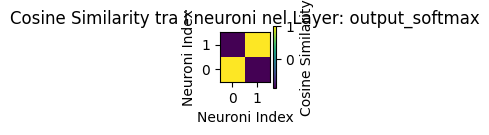

  Analisi di Somiglianza per 2 neuroni.
  Somiglianza Cosinus Media (tra unità diverse): -0.8730
  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sklearn.metrics.pairwise import cosine_similarity

# --- Passo 1: Carica il modello .h5 su Colab ---
# Opzione A: Caricare da Google Drive (consigliato se il modello è lì)
# from google.colab import drive
# drive.mount('/content/drive')
# model_path = '/content/drive/My Drive/il_tuo_modello.h5'

# Opzione B: Caricare direttamente dal tuo computer locale (per file più piccoli)
print("Per favore, carica il tuo file .h5.")
from google.colab import files
uploaded = files.upload()
model_filename = list(uploaded.keys())[0]
model_path = model_filename

# --- Passo 2: Carica il modello .h5 in Keras ---
try:
    print(f"\nCaricamento del modello da: {model_path}...")
    model = load_model(model_path)
    print("Modello caricato con successo!")

    # --- Passo 3: Analisi di Somiglianza per Layer ---
    print("\n--- Analisi di Somiglianza dei Pesi all'interno di Ogni Layer ---")

    for i, layer in enumerate(model.layers):
        if len(layer.get_weights()) > 0:
            weights = layer.get_weights()[0] # Principalmente interessati ai pesi (kernel)

            # Per Layer Convoluzionali (Conv2D) e Densi (Dense)
            if 'Conv' in layer.__class__.__name__ or 'Dense' in layer.__class__.__name__:
                print(f"\nAnalizzando il Layer: {layer.name} (Tipo: {layer.__class__.__name__})")

                # Appiattisci i pesi per ogni filtro/neurone per calcolare la somiglianza
                # Per Conv2D: (altezza, larghezza, canali_input, num_filtri) -> reshape a (num_filtri, altezza*larghezza*canali_input)
                # Per Dense: (input_features, output_features) -> trasponi e reshape a (output_features, input_features)
                if 'Conv' in layer.__class__.__name__:
                    # Reshape per avere (num_filters, dimensione_appiattita_filtro)
                    # Es: (3,3,3,64) -> (64, 3*3*3)
                    flat_weights = weights.reshape(-1, weights.shape[-1]).T
                    num_units = weights.shape[-1] # Numero di filtri
                    unit_type = "filtri"
                elif 'Dense' in layer.__class__.__name__:
                    # Reshape per avere (num_output_neurons, num_input_connections)
                    # Es: (128, 64) -> (64, 128)
                    flat_weights = weights.T
                    num_units = weights.shape[-1] # Numero di neuroni di output
                    unit_type = "neuroni"

                if num_units > 1: # Ha senso calcolare la somiglianza solo se ci sono almeno 2 unità
                    # Calcola la matrice di somiglianza cosinus
                    # Aggiungi una piccola costante per evitare divisioni per zero se i vettori sono tutti zeri
                    similarity_matrix = cosine_similarity(flat_weights + 1e-8)

                    # Visualizza la heatmap
                    plt.figure(figsize=(num_units * 0.4, num_units * 0.4)) # Scala la dimensione del grafico
                    plt.imshow(similarity_matrix, cmap='viridis', origin='lower')
                    plt.colorbar(label='Cosine Similarity')
                    plt.title(f'Cosine Similarity tra i {unit_type} nel Layer: {layer.name}')
                    plt.xlabel(f'{unit_type.capitalize()} Index')
                    plt.ylabel(f'{unit_type.capitalize()} Index')
                    plt.grid(False) # Di solito le heatmap non hanno griglia
                    plt.tight_layout()
                    plt.show()

                    print(f"  Analisi di Somiglianza per {num_units} {unit_type}.")
                    # Puoi anche calcolare la media della somiglianza fuori dalla diagonale
                    # per avere un'idea generale di quanto siano simili
                    np.fill_diagonal(similarity_matrix, np.nan) # Ignora la somiglianza con se stesso (sempre 1)
                    mean_similarity = np.nanmean(similarity_matrix)
                    print(f"  Somiglianza Cosinus Media (tra unità diverse): {mean_similarity:.4f}")
                    if mean_similarity > 0.8:
                        print("  (Alto valore: i pesi di questo layer tendono ad essere molto simili tra loro, potenziale ridondanza)")
                    elif mean_similarity < 0.2:
                        print("  (Basso valore: i pesi di questo layer tendono ad essere molto diversi tra loro)")
                else:
                    print(f"  Il layer {layer.name} ha solo 1 {unit_type}, nessuna somiglianza da calcolare tra unità.")

            else:
                print(f"\nLayer: {layer.name} (Tipo: {layer.__class__.__name__}) - Tipo di layer non adatto per analisi di somiglianza tra filtri/neuroni.")

        else:
            print(f"\nLayer {i+1}: {layer.name} (Tipo: {layer.__class__.__name__}) - Non ha parametri allenabili.")


except Exception as e:
    print(f"\nErrore durante il caricamento o l'analisi dei pesi del modello: {e}")
    print("Assicurati che il file sia un modello Keras valido in formato .h5 e che il percorso sia corretto.")
    print("Controlla anche la versione di TensorFlow/Keras con cui è stato salvato il modello.")

--- Caricamento del Modello 1 ---
Per favore, carica il file .h5 del MODELLO 1.


Saving TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_11-15.h5 to TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_11-15 (1).h5

--- Caricamento del Modello 2 ---
Per favore, carica il file .h5 del MODELLO 2.


Saving TwoConv1D_GlobalAvgPool_Attention_Light-ORIGINAL-50-BETA_awgn_RANDOM_snr_11-15.h5 to TwoConv1D_GlobalAvgPool_Attention_Light-ORIGINAL-50-BETA_awgn_RANDOM_snr_11-15 (1).h5

Caricamento del Modello 1 da: TwoConv1D_GlobalAvgPool_Attention_Heavy-ORIGINAL-50-BETA_awgn_RANDOM_snr_11-15 (1).h5...
Modello 1 caricato con successo!

Caricamento del Modello 2 da: TwoConv1D_GlobalAvgPool_Attention_Light-ORIGINAL-50-BETA_awgn_RANDOM_snr_11-15 (1).h5...
Modello 2 caricato con successo!

--- Analisi di Somiglianza e Heatmap dei Pesi per Layer ---

Layer 0: input_layer_3 e/o input_layer_2 - Non ha pesi allenabili o i tipi di layer non corrispondono per il confronto.

Layer 1: reshape_for_conv e/o reshape_for_conv - Non ha pesi allenabili o i tipi di layer non corrispondono per il confronto.


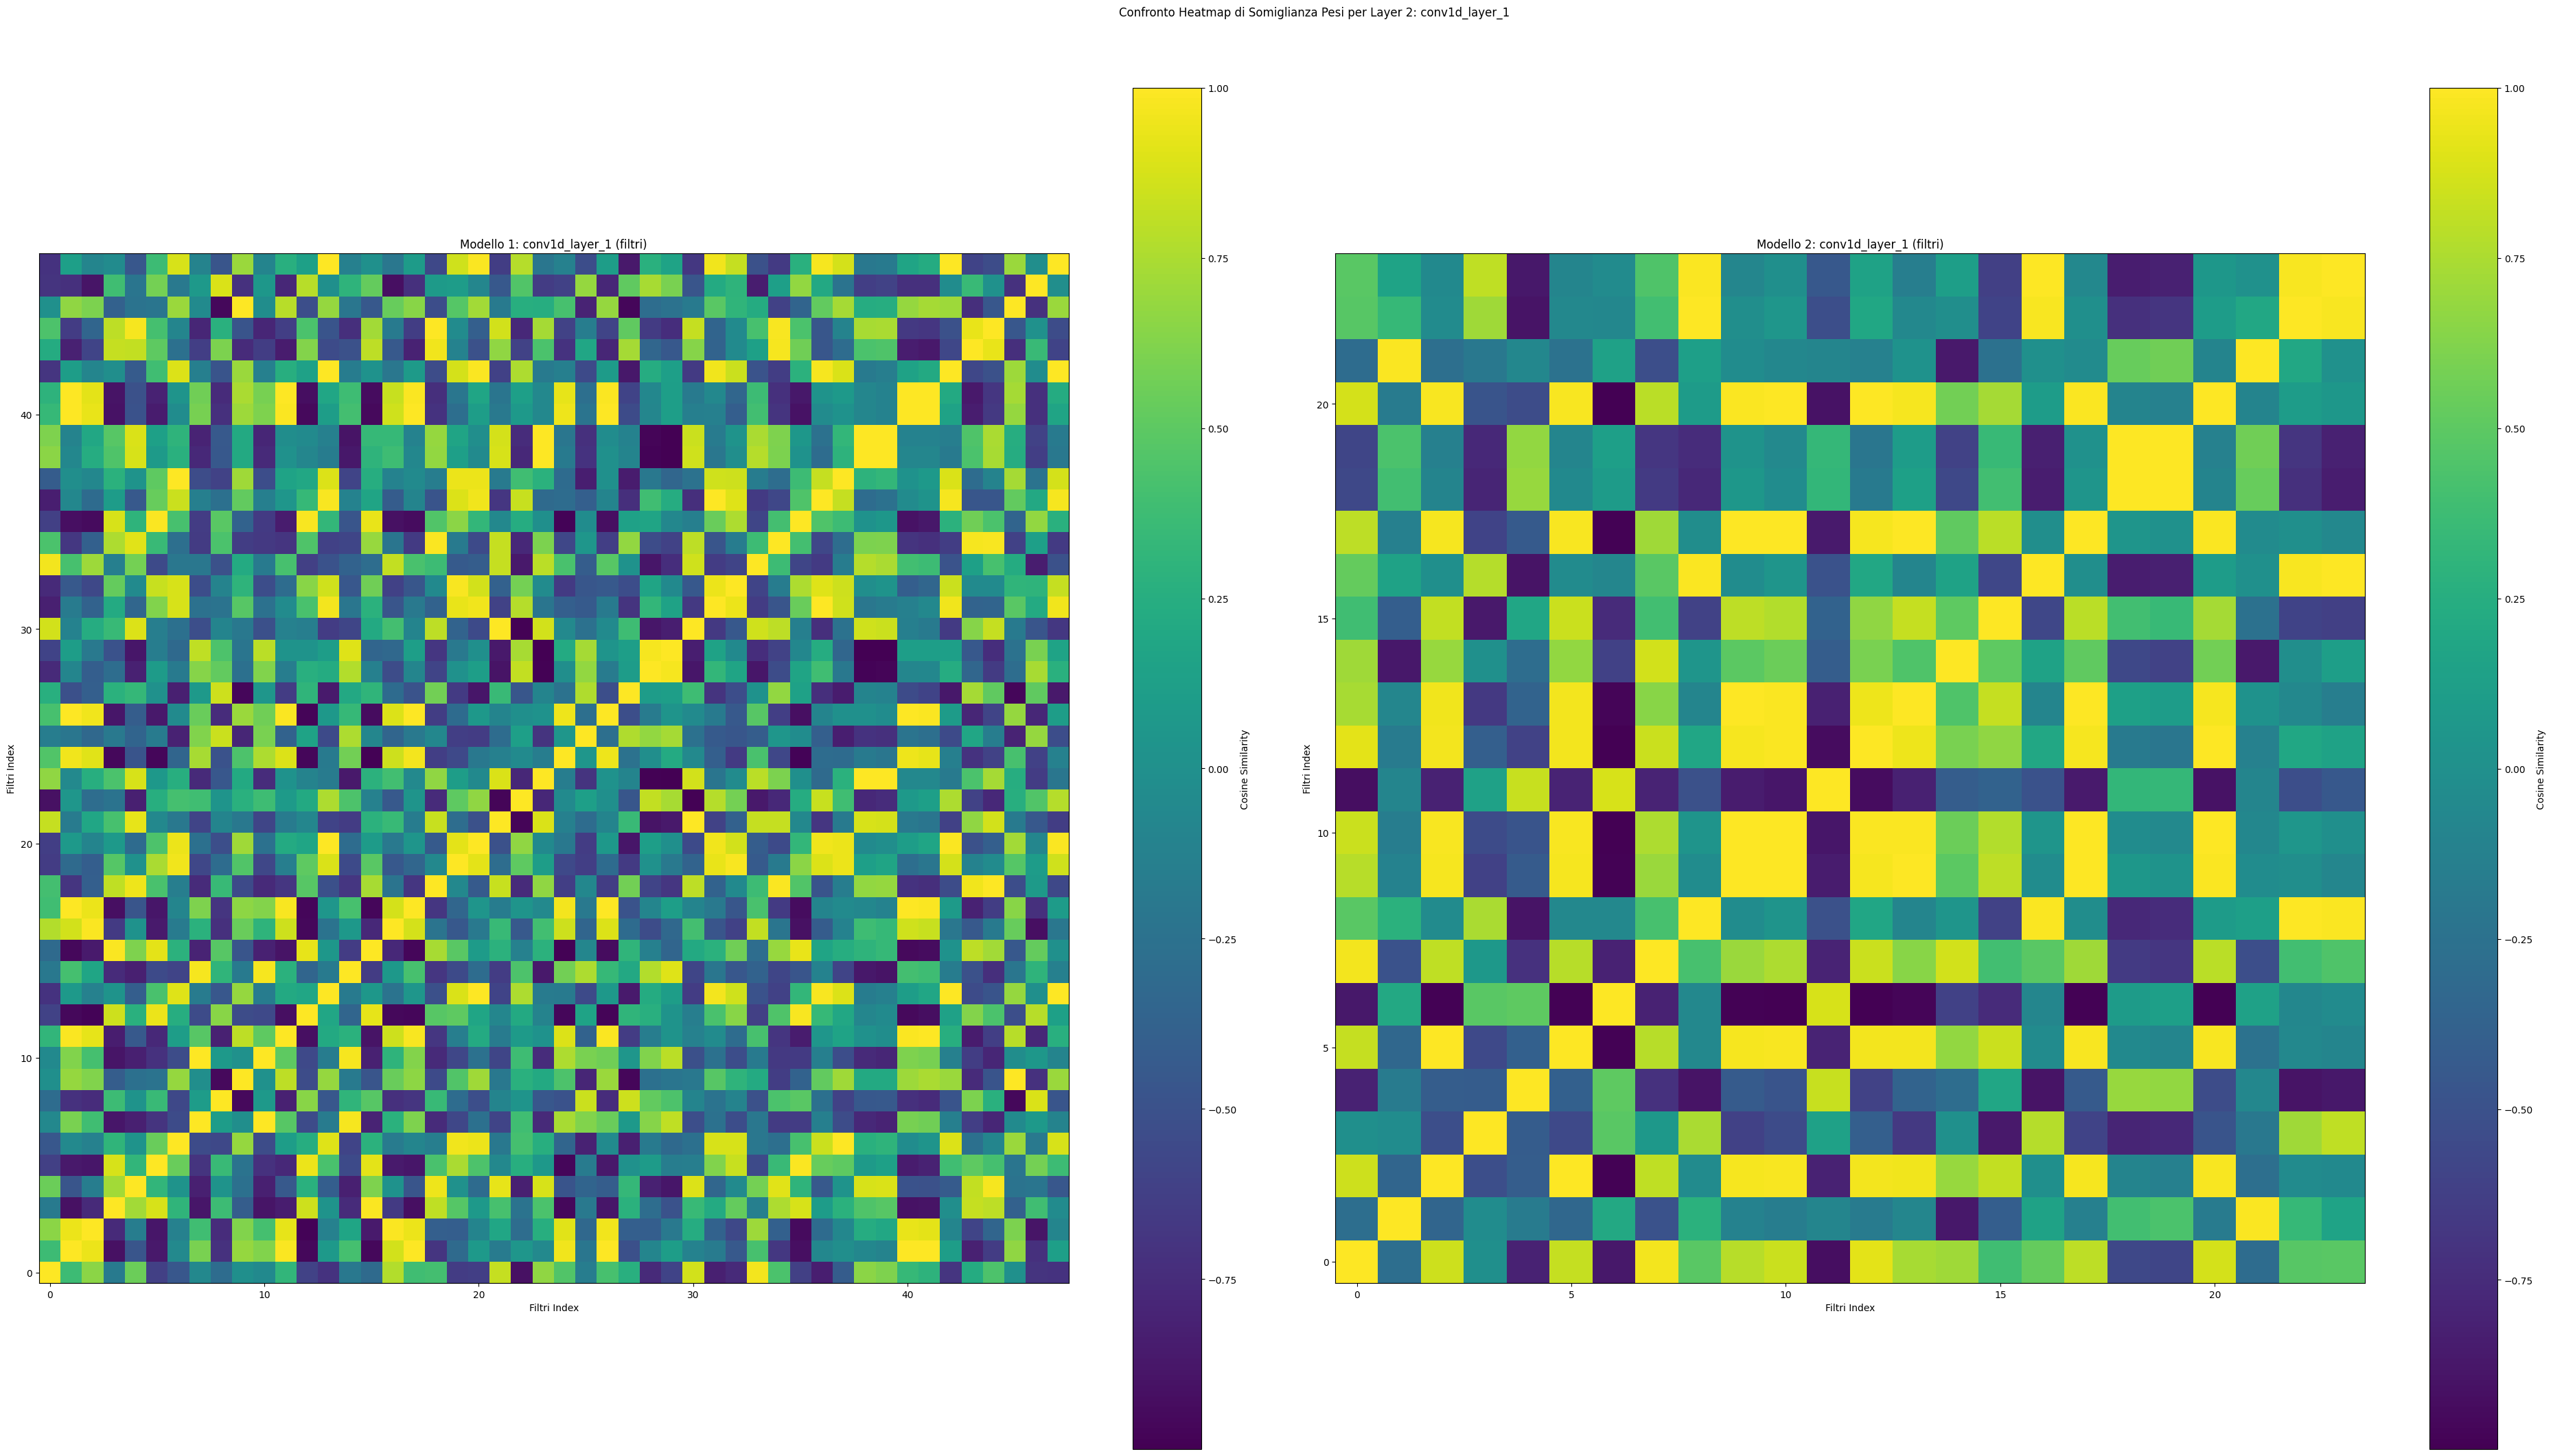


Confronto per Layer 2: conv1d_layer_1
  Ultra-CAN-Heavy - Avg. Similarity: 0.0002
  Ultra-CAN-Light - Avg. Similarity: 0.0762


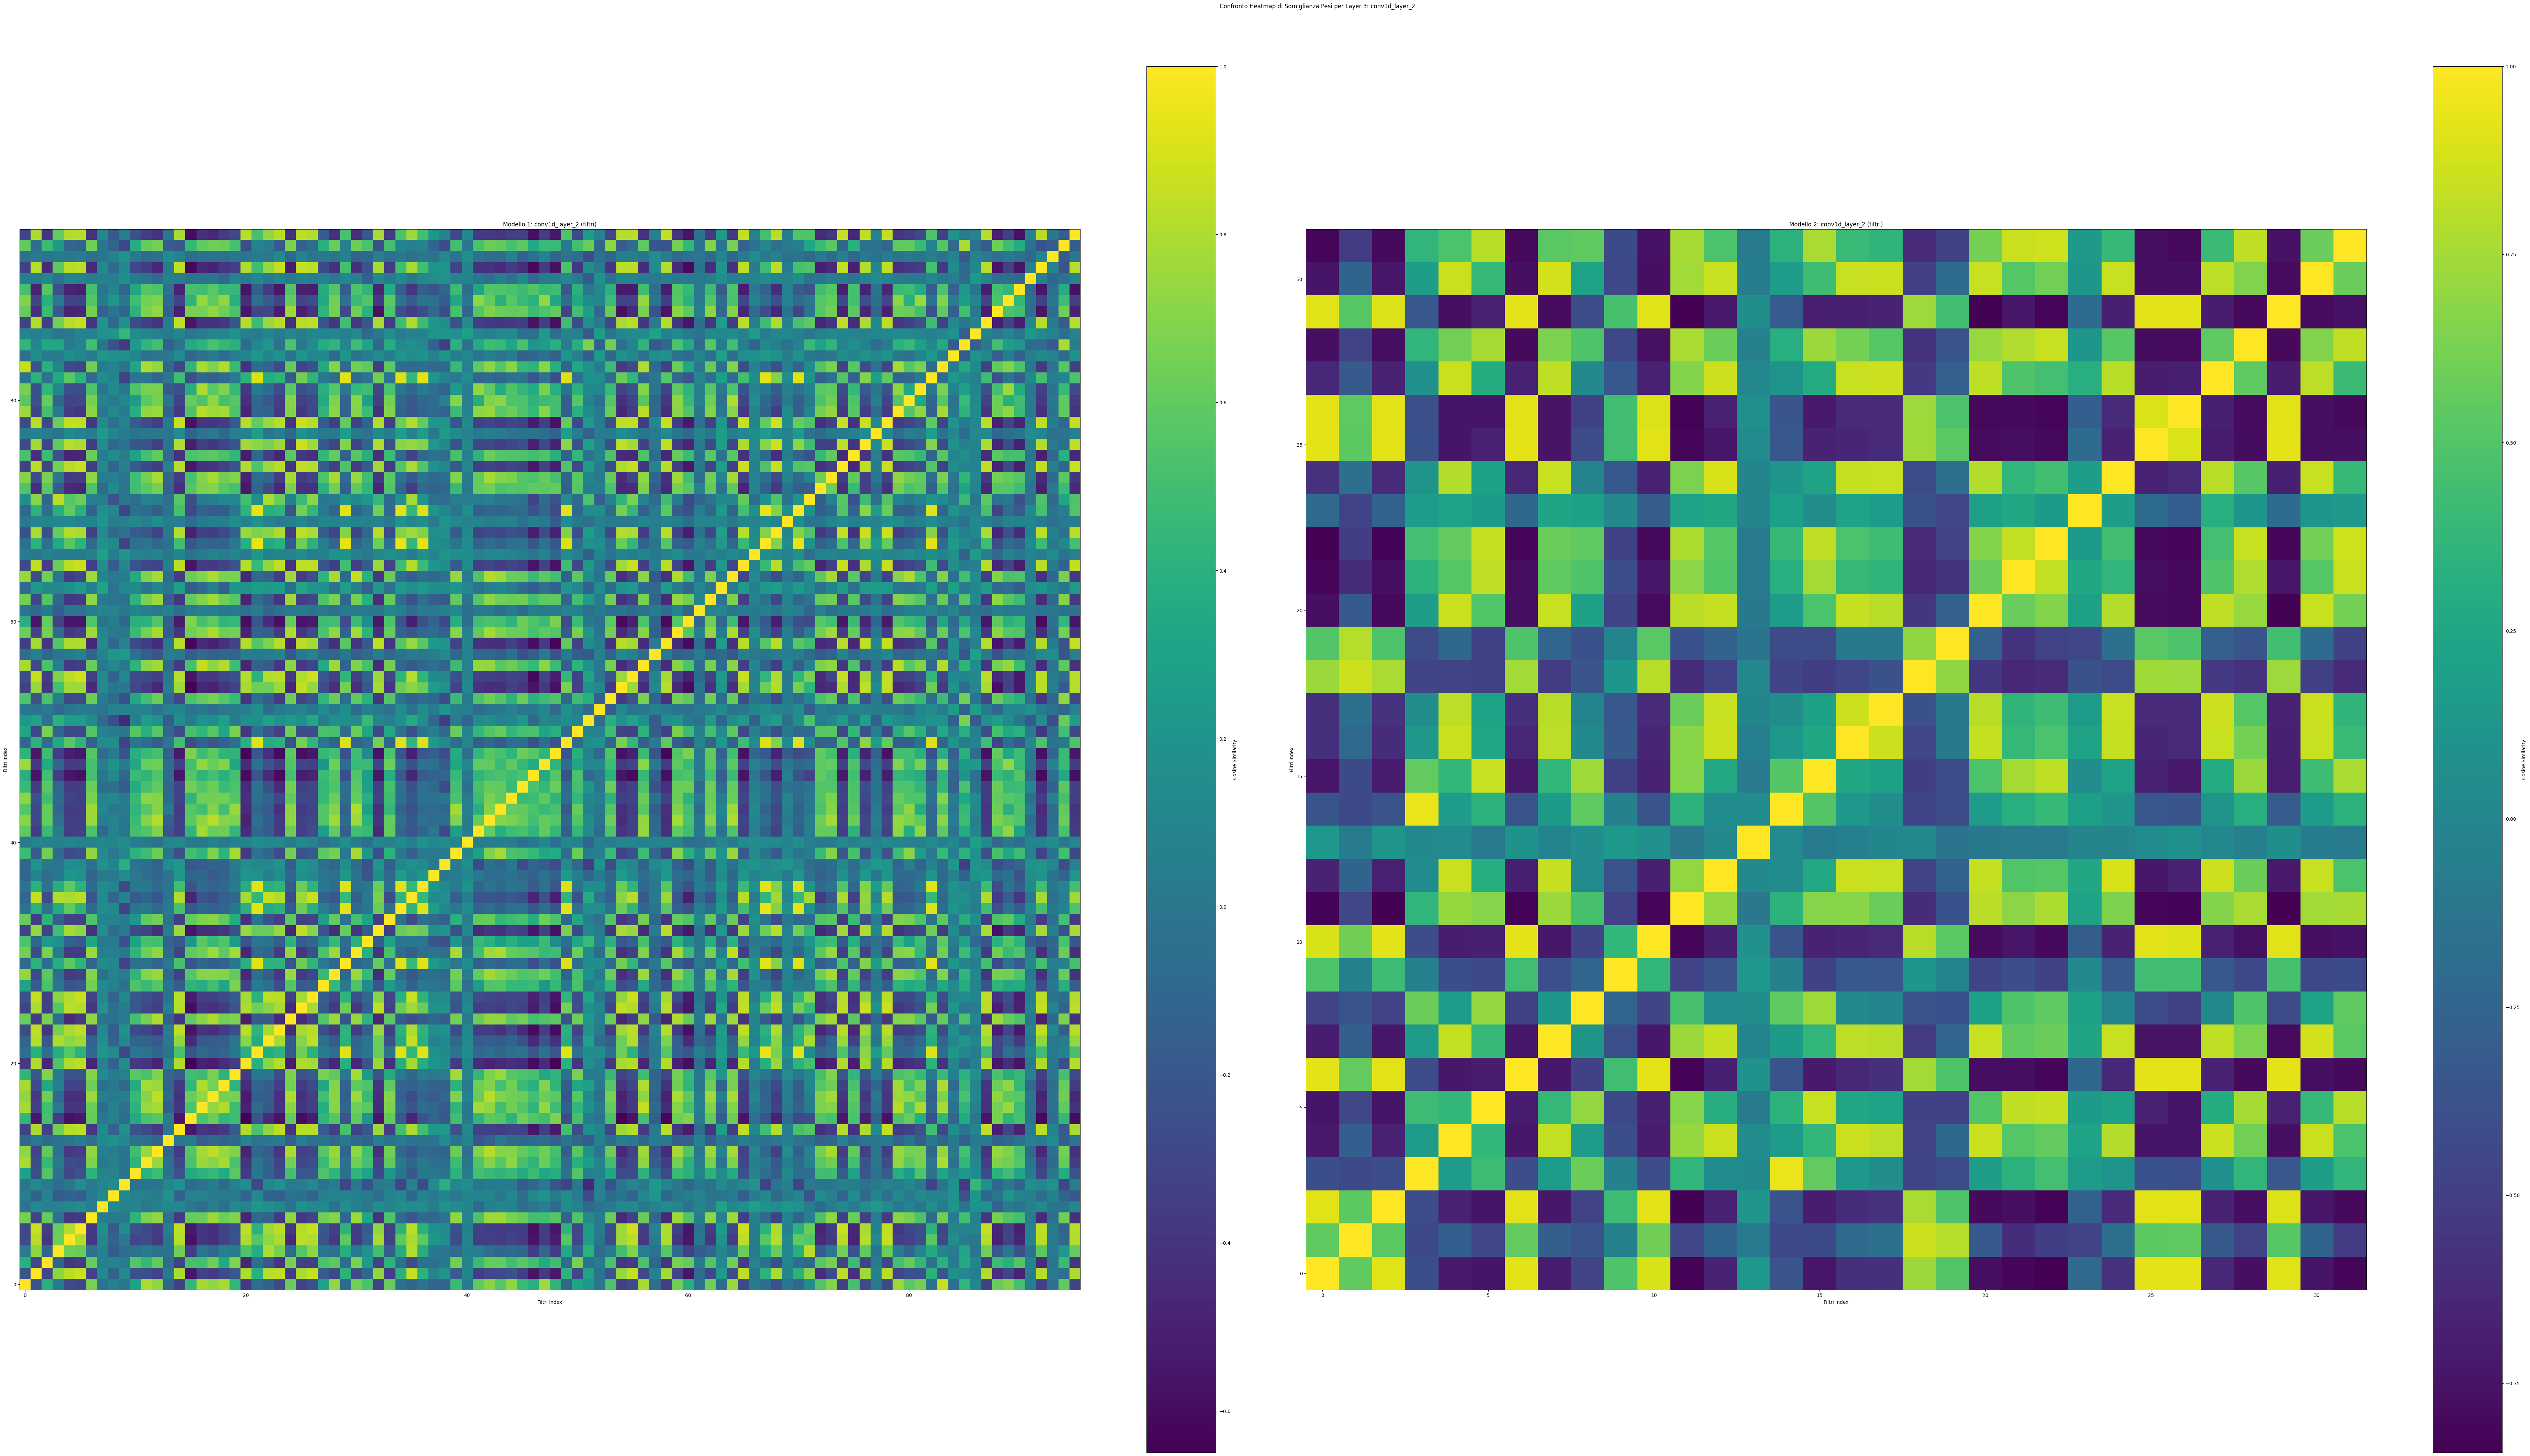


Confronto per Layer 3: conv1d_layer_2
  Ultra-CAN-Heavy - Avg. Similarity: 0.1313
  Ultra-CAN-Light - Avg. Similarity: 0.0215


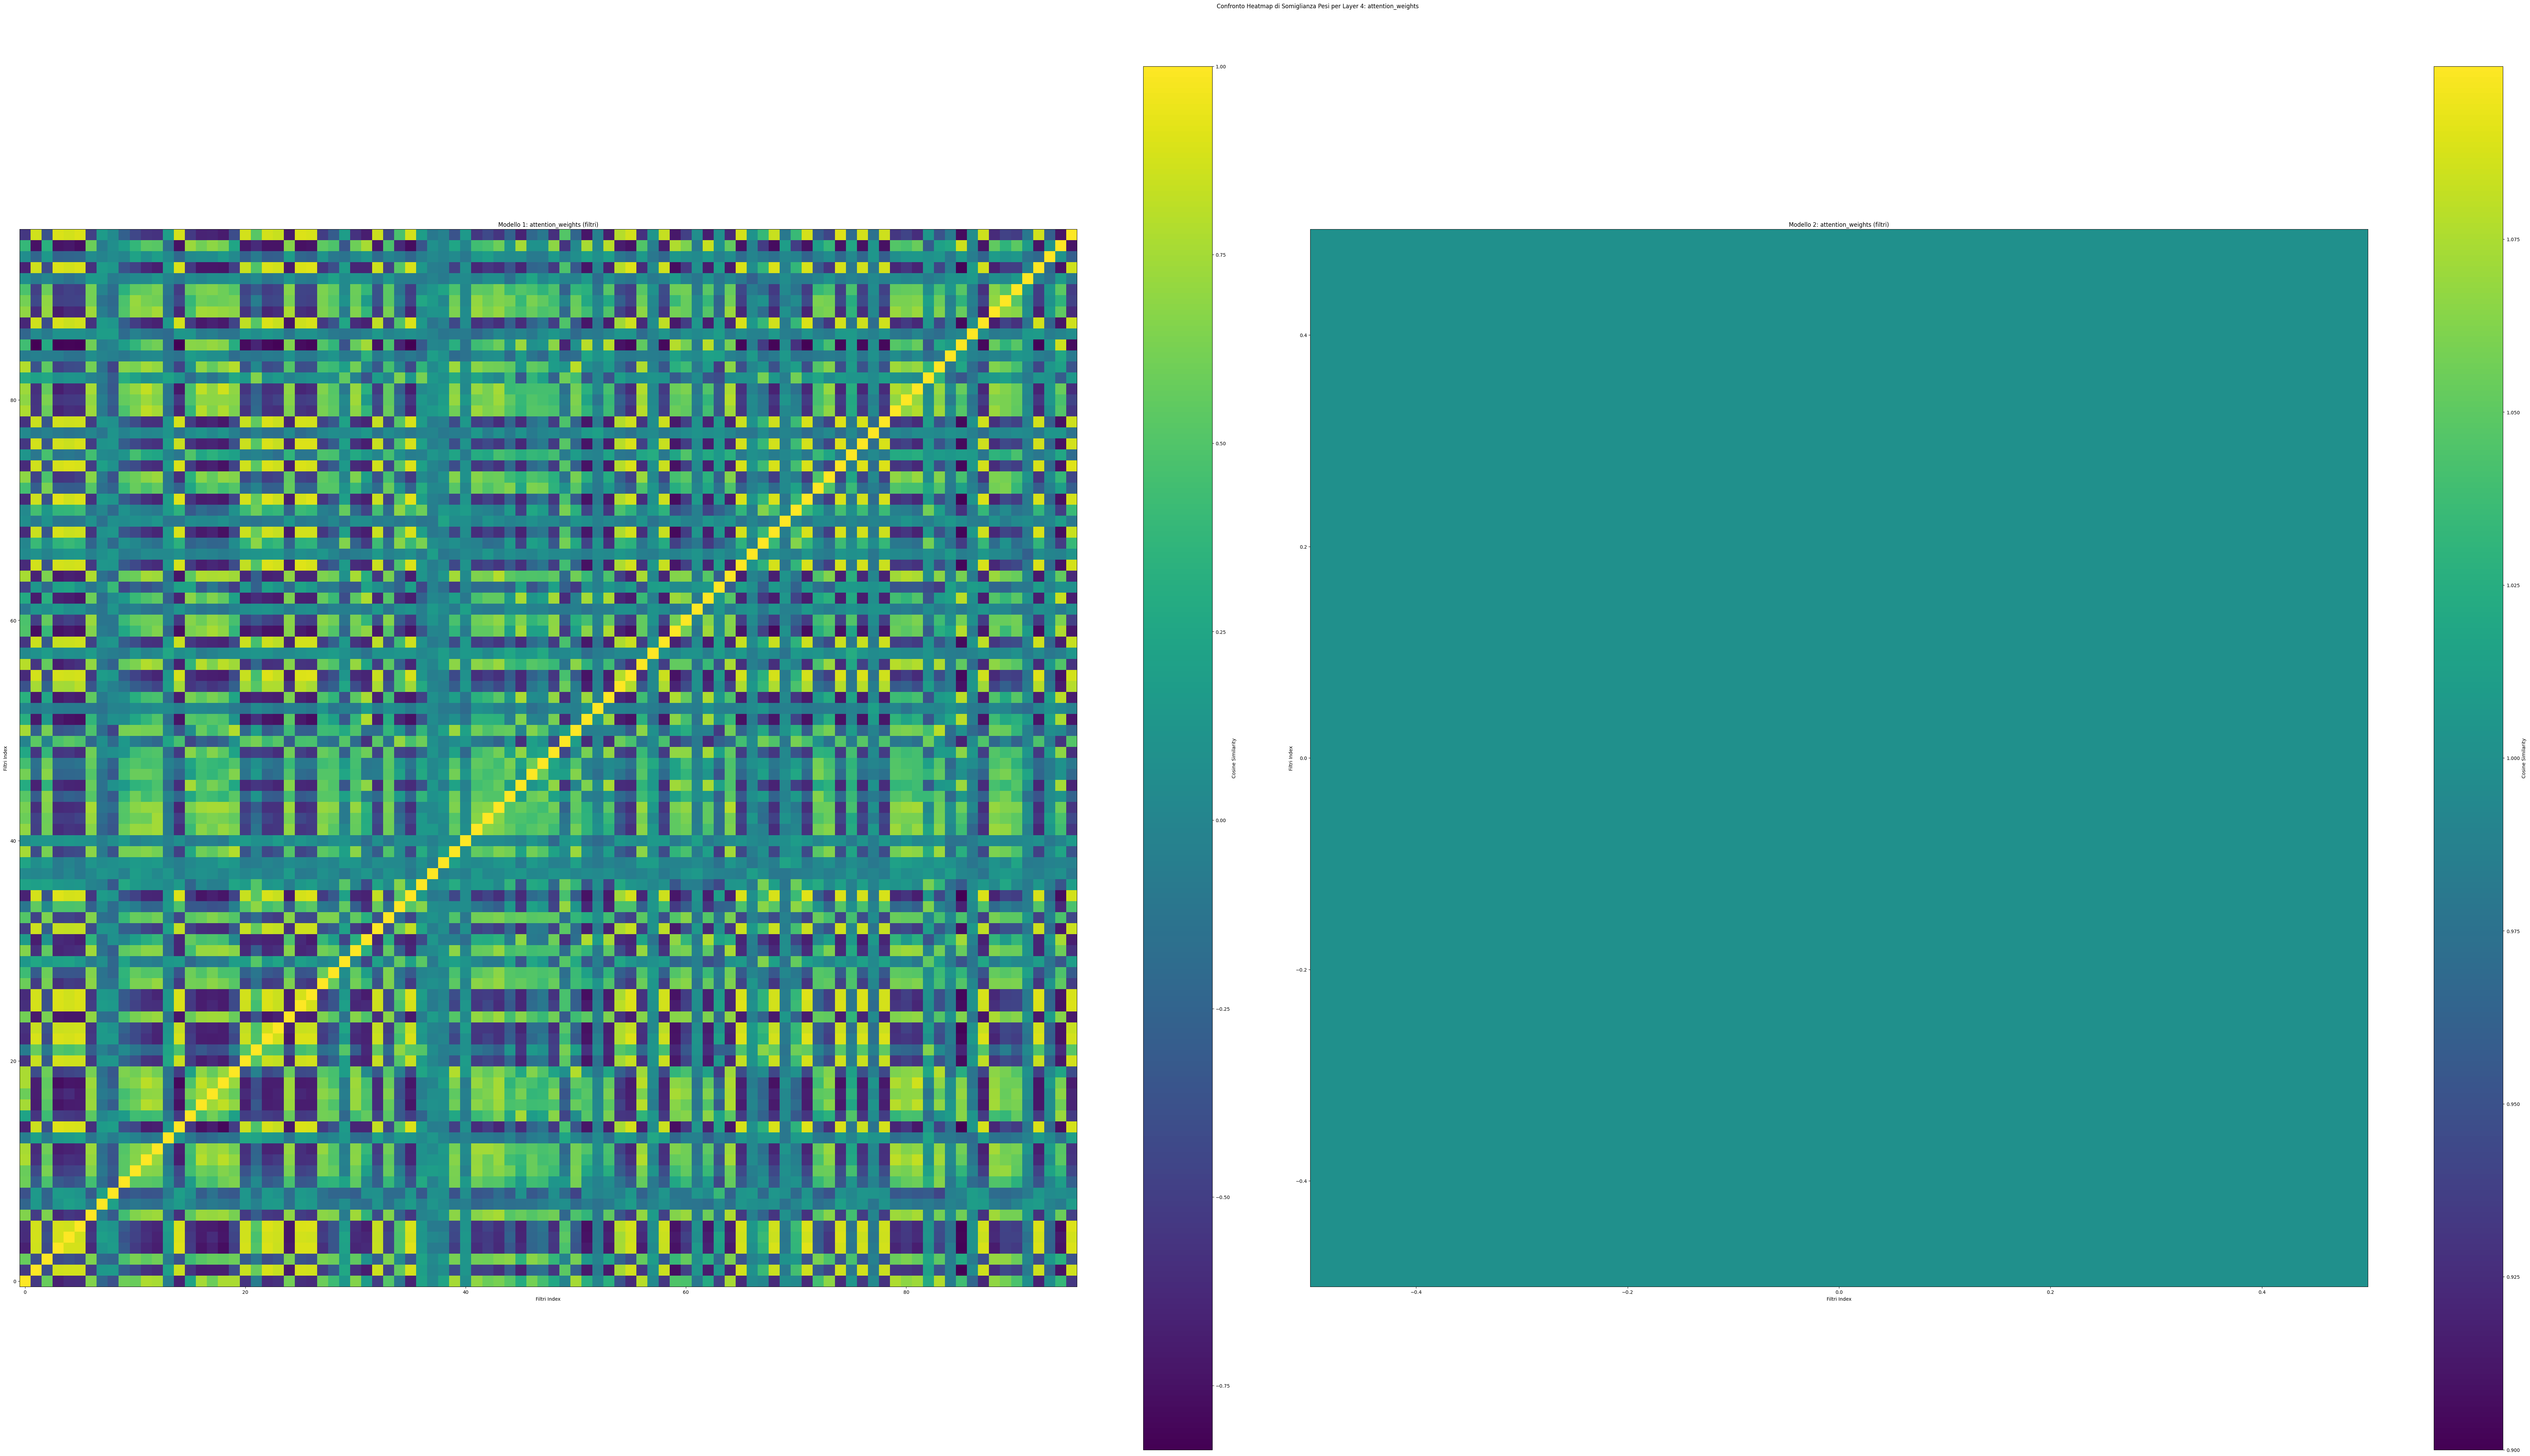


Confronto per Layer 4: attention_weights
  Ultra-CAN-Heavy - Avg. Similarity: 0.0589
  Ultra-CAN-Light - Avg. Similarity: nan

Layer 5: multiply_attention e/o multiply_attention - Non ha pesi allenabili o i tipi di layer non corrispondono per il confronto.

Layer 6: global_average_pooling_layer e/o global_average_pooling_layer - Non ha pesi allenabili o i tipi di layer non corrispondono per il confronto.

Layer 7: dropout_layer e/o dropout_layer - Non ha pesi allenabili o i tipi di layer non corrispondono per il confronto.


/tmp/ipython-input-747194257.py:108: RuntimeWarning: Mean of empty slice
  mean_similarity2 = np.nanmean(similarity_matrix2)



Confronto per Layer 8: fc1
  Ultra-CAN-Heavy - Avg. Similarity: 0.0380
  Ultra-CAN-Light - Avg. Similarity: 0.0290


/tmp/ipython-input-747194257.py:99: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aggiusta layout persuptitle


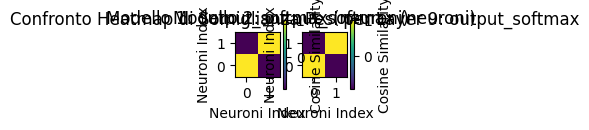


Confronto per Layer 9: output_softmax
  Ultra-CAN-Heavy - Avg. Similarity: -0.8545
  Ultra-CAN-Light - Avg. Similarity: -0.9088


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sklearn.metrics.pairwise import cosine_similarity
import sys # Per exit

# Funzione per caricare un file in Colab
def upload_file_from_colab(prompt_msg):
    print(prompt_msg)
    from google.colab import files
    uploaded = files.upload()
    if not uploaded:
        print("Nessun file caricato. Uscita.")
        sys.exit() # Esci dallo script
    return list(uploaded.keys())[0]

# --- Caricamento dei due modelli .h5 ---
print("--- Caricamento del Modello 1 ---")
model1_filename = upload_file_from_colab("Per favore, carica il file .h5 del MODELLO 1.")
model1_path = model1_filename

print("\n--- Caricamento del Modello 2 ---")
model2_filename = upload_file_from_colab("Per favore, carica il file .h5 del MODELLO 2.")
model2_path = model2_filename

try:
    print(f"\nCaricamento del Modello 1 da: {model1_path}...")
    model1 = load_model(model1_path)
    print("Modello 1 caricato con successo!")

    print(f"\nCaricamento del Modello 2 da: {model2_path}...")
    model2 = load_model(model2_path)
    print("Modello 2 caricato con successo!")

    print("\n--- Analisi di Somiglianza e Heatmap dei Pesi per Layer ---")

    # Determina il numero di layer da confrontare (minimo tra i due modelli)
    min_layers = min(len(model1.layers), len(model2.layers))

    for i in range(min_layers):
        layer1 = model1.layers[i]
        layer2 = model2.layers[i]

        # Controlla se entrambi i layer hanno pesi e sono di tipo confrontabile
        if (len(layer1.get_weights()) > 0 and len(layer2.get_weights()) > 0 and
            ('Conv' in layer1.__class__.__name__ or 'Dense' in layer1.__class__.__name__) and
            (layer1.__class__.__name__ == layer2.__class__.__name__)): # Assicurati che siano dello stesso tipo

            # Estrai i pesi per entrambi i modelli
            weights1 = layer1.get_weights()[0]
            weights2 = layer2.get_weights()[0]

            # Processa i pesi in base al tipo di layer
            if 'Conv' in layer1.__class__.__name__:
                flat_weights1 = weights1.reshape(-1, weights1.shape[-1]).T
                flat_weights2 = weights2.reshape(-1, weights2.shape[-1]).T
                num_units = weights1.shape[-1]
                unit_type = "filtri"
            elif 'Dense' in layer1.__class__.__name__:
                flat_weights1 = weights1.T
                flat_weights2 = weights2.T
                num_units = weights1.shape[-1]
                unit_type = "neuroni"
            else:
                # Questo caso dovrebbe essere già coperto dal controllo iniziale, ma per sicurezza
                print(f"\nSkipping Layer {i} ({layer1.name}): Tipo di layer non supportato per il confronto di pesi.")
                continue

            if num_units > 1: # Ha senso calcolare la somiglianza solo se ci sono almeno 2 unità
                # Calcola la matrice di somiglianza cosinus per Modello 1
                similarity_matrix1 = cosine_similarity(flat_weights1 + 1e-8)
                # Calcola la matrice di somiglianza cosinus per Modello 2
                similarity_matrix2 = cosine_similarity(flat_weights2 + 1e-8)

                # --- Visualizza le Heatmap fianco a fianco ---
                fig, axes = plt.subplots(1, 2, figsize=(num_units * 0.8, num_units * 0.45)) # Adatta figsize

                # Heatmap per Modello 1
                im1 = axes[0].imshow(similarity_matrix1, cmap='viridis', origin='lower')
                fig.colorbar(im1, ax=axes[0], label='Cosine Similarity')
                axes[0].set_title(f'Modello 1: {layer1.name} ({unit_type})')
                axes[0].set_xlabel(f'{unit_type.capitalize()} Index')
                axes[0].set_ylabel(f'{unit_type.capitalize()} Index')
                axes[0].grid(False)

                # Heatmap per Modello 2
                im2 = axes[1].imshow(similarity_matrix2, cmap='viridis', origin='lower')
                fig.colorbar(im2, ax=axes[1], label='Cosine Similarity')
                axes[1].set_title(f'Modello 2: {layer2.name} ({unit_type})')
                axes[1].set_xlabel(f'{unit_type.capitalize()} Index')
                axes[1].set_ylabel(f'{unit_type.capitalize()} Index')
                axes[1].grid(False)

                plt.suptitle(f'Confronto Heatmap di Somiglianza Pesi per Layer {i}: {layer1.name}')
                plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aggiusta layout persuptitle
                plt.show()

                print(f"\nConfronto per Layer {i}: {layer1.name}")
                np.fill_diagonal(similarity_matrix1, np.nan)
                mean_similarity1 = np.nanmean(similarity_matrix1)
                print(f"  Ultra-CAN-Heavy - Avg. Similarity: {mean_similarity1:.4f}")

                np.fill_diagonal(similarity_matrix2, np.nan)
                mean_similarity2 = np.nanmean(similarity_matrix2)
                print(f"  Ultra-CAN-Light - Avg. Similarity: {mean_similarity2:.4f}")

            else:
                print(f"\nLayer {i} ({layer1.name}): Ha solo 1 {unit_type}, nessuna somiglianza da calcolare tra unità.")
        else:
            print(f"\nLayer {i}: {layer1.name} e/o {layer2.name} - Non ha pesi allenabili o i tipi di layer non corrispondono per il confronto.")


except Exception as e:
    print(f"\nErrore durante il caricamento o l'analisi dei pesi dei modelli: {e}")
    print("Assicurati che i file siano modelli Keras validi in formato .h5 e che i percorsi siano corretti.")
    print("Controlla anche che i modelli abbiano una struttura compatibile per il confronto (stesso numero di layer, stessi tipi di layer agli stessi indici).")